In [ ]:
# import pickle

# with open("./results/pretraining.pkl", "wb") as f:
#     results = pickle.load(f)
# runs_df = results["runs_df"]
# no_dp_results = results["no_dp_results"]

In [1]:
import pandas as pd 
from tqdm import tqdm
import wandb

ARCHIVE_SWEEP_IDS = {"llxz0pio", "7i09oqiw"}

api = wandb.Api(timeout=60)

# Project is specified by <entity/project-name>
runs = api.runs("shlomihod/ydnpd-dp-ft",
                filters={"created_at": {"$gte": "2025-01-27T09:00:00.000000+00:00"}},
                # per_page=3_000
                )
run_records = []

for run in tqdm(runs):

    run_records.append({
        "id_": run.id,
        "summary": run.summary._json_dict,
        "config": {k: v for k,v in run.config.items()
          if not k.startswith('_')},
        "name": run.name,
        "sweep": run.sweep.id,
    })

runs_df = pd.DataFrame(run_records)

for col in ("summary", "config"):
    runs_df = runs_df.join(pd.json_normalize(runs_df[col]))

def extract_public_data_pointer(r):
    if not r['public_data_pointer']:
        family, _ = r['private_data_pointer'].split("/")
        return f"{family}/no-pre"
    elif isinstance(r['public_data_pointer'], list):
        return r['public_data_pointer'][0]
    else:
        return r['public_data_pointer']

runs_df['public_data_pointer'] = runs_df.apply(extract_public_data_pointer, axis=1)

runs_df.loc[
    runs_df['public_data_pointer'].str.endswith("no-pre"),
    'dp/private.test/auc'
    ] = runs_df.loc[runs_df['public_data_pointer'].str.endswith("no-pre"), 'dp.test/auc']

100%|██████████| 4110/4110 [10:00<00:00,  6.84it/s]


In [2]:
runs_df['private_data_pointer'].value_counts()

private_data_pointer
acs/national    1450
we/2023         1450
edad/2023       1210
Name: count, dtype: int64

In [14]:
from ydnpd.pretraining.trainer import TransformerTrainer

no_dp_results = {pointer.split("/")[0]: [
    TransformerTrainer.train_and_evaluate(public_data_pointer=pointer)["no-dp"]
    for _ in range(5)]
    for pointer in runs_df['private_data_pointer'].unique()}

Features to process: {'SEX', 'EDU', 'HOUSING_TYPE', 'MSP', 'RAC1P', 'PINCP_DECILE'}
Available columns: Index(['EDU', 'HOUSING_TYPE', 'MSP', 'PINCP_DECILE', 'RAC1P', 'SEX'], dtype='object')
EDU original values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
HOUSING_TYPE original values: [1, 2]
MSP original values: [1, 2, 3, 4, 5, 6]
PINCP_DECILE original values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RAC1P original values: [1, 2, 3, 5, 6, 7, 8, 9]
SEX original values: [1, 2]
schema={'SEX': {'description': "Person's gender", 'dtype': 'int64', 'values': {1: 'Male', 2: 'Female'}, 'type': 'categorical'}, 'MSP': {'description': 'Marital Status', 'dtype': 'int64', 'values': {1: 'Now married, spouse present', 2: 'Now Married, spouse absent', 3: 'Widowed', 4: 'Divorced', 5: 'Separated', 6: 'Never married'}, 'type': 'categorical'}, 'RAC1P': {'description': "Person's Race", 'dtype': 'int64', 'values': {1: 'White alone', 2: 'Black or African American alone', 3: 'American Indian alone', 4: 'Alaska Native alone', 

epoch 1/20 loss: 0.6111: 100%|██████████| 112/112 [00:08<00:00, 13.35batch/s]


val loss - new best: 0.5922842621803284
val accuracy - new best: 0.6763224181360201
val AUC - new best: 0.74291694391201
epoch 1, validation loss: 0.5922842621803284, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.5922842621803284, epochs without improvement: 0/10
val accuracy - new best: 0.6763224181360201
val auc - new best: 0.74291694391201


epoch 2/20 loss: 0.6902: 100%|██████████| 112/112 [00:08<00:00, 13.03batch/s]


val loss - new best: 0.5762435793876648
val accuracy - new best: 0.6908060453400504
val AUC - new best: 0.7557578365811402
epoch 2, validation loss: 0.5762435793876648, epochs without improvement: 0/10


epoch 3/20 loss: 0.5436: 100%|██████████| 112/112 [00:08<00:00, 12.73batch/s]


val loss - new best: 0.5711737871170044
val accuracy - new best: 0.6851385390428212
val AUC - new best: 0.7606918773334265
epoch 3, validation loss: 0.5711737871170044, epochs without improvement: 0/10


epoch 4/20 loss: 0.5993: 100%|██████████| 112/112 [00:08<00:00, 13.25batch/s]


val loss - new best: 0.5605775117874146
val accuracy - new best: 0.7021410579345088
val AUC - new best: 0.7700660783507252
epoch 4, validation loss: 0.5605775117874146, epochs without improvement: 0/10


epoch 5/20 loss: 0.5404: 100%|██████████| 112/112 [00:08<00:00, 12.82batch/s]


epoch 5, validation loss: 0.5709952116012573, epochs without improvement: 1/10
reached 5.
epoch 5, val loss: 0.5709952116012573, epochs without improvement: 1/10
val accuracy - new best: 0.7021410579345088
val auc - new best: 0.7700660783507252


epoch 6/20 loss: 0.5350: 100%|██████████| 112/112 [00:08<00:00, 13.02batch/s]


val loss - new best: 0.5600463151931763
val accuracy - new best: 0.7052896725440806
val AUC - new best: 0.7699374470984124
epoch 6, validation loss: 0.5600463151931763, epochs without improvement: 0/10


epoch 7/20 loss: 0.5100: 100%|██████████| 112/112 [00:08<00:00, 12.88batch/s]


val loss - new best: 0.5586526393890381
val accuracy - new best: 0.7040302267002518
val AUC - new best: 0.774909600814347
epoch 7, validation loss: 0.5586526393890381, epochs without improvement: 0/10


epoch 8/20 loss: 0.4876: 100%|██████████| 112/112 [00:08<00:00, 13.00batch/s]


val loss - new best: 0.5566749572753906
val accuracy - new best: 0.6977329974811083
val AUC - new best: 0.7715223111701157
epoch 8, validation loss: 0.5566749572753906, epochs without improvement: 0/10


epoch 9/20 loss: 0.5596: 100%|██████████| 112/112 [00:08<00:00, 12.99batch/s]


val loss - new best: 0.5566703081130981
val accuracy - new best: 0.6977329974811083
val AUC - new best: 0.7709807894782811
epoch 9, validation loss: 0.5566703081130981, epochs without improvement: 0/10
reached 9.
epoch 9, val loss: 0.5566703081130981, epochs without improvement: 0/10
val accuracy - new best: 0.6977329974811083
val auc - new best: 0.7709807894782811


epoch 10/20 loss: 0.5230: 100%|██████████| 112/112 [00:08<00:00, 12.90batch/s]


epoch 10, validation loss: 0.5593472123146057, epochs without improvement: 1/10


epoch 11/20 loss: 0.5354: 100%|██████████| 112/112 [00:08<00:00, 12.94batch/s]


val loss - new best: 0.5542905926704407
val accuracy - new best: 0.6983627204030227
val AUC - new best: 0.7745348233384732
epoch 11, validation loss: 0.5542905926704407, epochs without improvement: 0/10


epoch 12/20 loss: 0.5446: 100%|██████████| 112/112 [00:08<00:00, 13.29batch/s]


val loss - new best: 0.5524011254310608
val accuracy - new best: 0.7002518891687658
val AUC - new best: 0.7786430832117159
epoch 12, validation loss: 0.5524011254310608, epochs without improvement: 0/10


epoch 13/20 loss: 0.5744: 100%|██████████| 112/112 [00:08<00:00, 13.12batch/s]


val loss - new best: 0.5515081882476807
val accuracy - new best: 0.7065491183879093
val AUC - new best: 0.7776315016348874
epoch 13, validation loss: 0.5515081882476807, epochs without improvement: 0/10
reached 13.
epoch 13, val loss: 0.5515081882476807, epochs without improvement: 0/10
val accuracy - new best: 0.7065491183879093
val auc - new best: 0.7776315016348874


epoch 14/20 loss: 0.5879: 100%|██████████| 112/112 [00:08<00:00, 13.14batch/s]


epoch 14, validation loss: 0.5562633275985718, epochs without improvement: 1/10


epoch 15/20 loss: 0.5096: 100%|██████████| 112/112 [00:08<00:00, 13.05batch/s]


epoch 15, validation loss: 0.5567647814750671, epochs without improvement: 2/10


epoch 16/20 loss: 0.4931: 100%|██████████| 112/112 [00:08<00:00, 13.03batch/s]


epoch 16, validation loss: 0.5551214218139648, epochs without improvement: 3/10


epoch 17/20 loss: 0.4474: 100%|██████████| 112/112 [00:08<00:00, 12.46batch/s]


epoch 17, validation loss: 0.5531567931175232, epochs without improvement: 4/10
reached 17.
epoch 17, val loss: 0.5531567931175232, epochs without improvement: 4/10
val accuracy - new best: 0.7065491183879093
val auc - new best: 0.7776315016348874


epoch 18/20 loss: 0.4928: 100%|██████████| 112/112 [00:09<00:00, 11.86batch/s]


val loss - new best: 0.5509486198425293
val accuracy - new best: 0.7103274559193955
val AUC - new best: 0.7789257543587732
epoch 18, validation loss: 0.5509486198425293, epochs without improvement: 0/10


epoch 19/20 loss: 0.5037: 100%|██████████| 112/112 [00:09<00:00, 11.55batch/s]


epoch 19, validation loss: 0.5594491958618164, epochs without improvement: 1/10


epoch 20/20 loss: 0.5179: 100%|██████████| 112/112 [00:09<00:00, 11.87batch/s]


epoch 20, validation loss: 0.5547764897346497, epochs without improvement: 2/10
Features to process: {'SEX', 'EDU', 'HOUSING_TYPE', 'MSP', 'RAC1P', 'PINCP_DECILE'}
Available columns: Index(['EDU', 'HOUSING_TYPE', 'MSP', 'PINCP_DECILE', 'RAC1P', 'SEX'], dtype='object')
EDU original values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
HOUSING_TYPE original values: [1, 2]
MSP original values: [1, 2, 3, 4, 5, 6]
PINCP_DECILE original values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RAC1P original values: [1, 2, 3, 5, 6, 7, 8, 9]
SEX original values: [1, 2]
schema={'SEX': {'description': "Person's gender", 'dtype': 'int64', 'values': {1: 'Male', 2: 'Female'}, 'type': 'categorical'}, 'MSP': {'description': 'Marital Status', 'dtype': 'int64', 'values': {1: 'Now married, spouse present', 2: 'Now Married, spouse absent', 3: 'Widowed', 4: 'Divorced', 5: 'Separated', 6: 'Never married'}, 'type': 'categorical'}, 'RAC1P': {'description': "Person's Race", 'dtype': 'int64', 'values': {1: 'White alone', 2: 'Black or

epoch 1/20 loss: 0.5405: 100%|██████████| 112/112 [00:22<00:00,  4.89batch/s]


val loss - new best: 0.591935396194458
val accuracy - new best: 0.6769521410579346
val AUC - new best: 0.7440079274964388
epoch 1, validation loss: 0.591935396194458, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.591935396194458, epochs without improvement: 0/10
val accuracy - new best: 0.6769521410579346
val auc - new best: 0.7440079274964388


epoch 2/20 loss: 0.5879: 100%|██████████| 112/112 [00:19<00:00,  5.82batch/s]


val loss - new best: 0.5755394101142883
val accuracy - new best: 0.6832493702770781
val AUC - new best: 0.7573474647732994
epoch 2, validation loss: 0.5755394101142883, epochs without improvement: 0/10


epoch 3/20 loss: 0.6048: 100%|██████████| 112/112 [00:18<00:00,  6.06batch/s]


val loss - new best: 0.5701673030853271
val accuracy - new best: 0.6933249370277078
val AUC - new best: 0.7597199967603981
epoch 3, validation loss: 0.5701673030853271, epochs without improvement: 0/10


epoch 4/20 loss: 0.6411: 100%|██████████| 112/112 [00:19<00:00,  5.82batch/s]


val loss - new best: 0.5697078108787537
val accuracy - new best: 0.6889168765743073
val AUC - new best: 0.7646429212316204
epoch 4, validation loss: 0.5697078108787537, epochs without improvement: 0/10


epoch 5/20 loss: 0.5343: 100%|██████████| 112/112 [00:18<00:00,  5.90batch/s]


val loss - new best: 0.5641482472419739
val accuracy - new best: 0.6945843828715366
val AUC - new best: 0.76717425723392
epoch 5, validation loss: 0.5641482472419739, epochs without improvement: 0/10
reached 5.
epoch 5, val loss: 0.5641482472419739, epochs without improvement: 0/10
val accuracy - new best: 0.6945843828715366
val auc - new best: 0.76717425723392


epoch 6/20 loss: 0.5307: 100%|██████████| 112/112 [00:19<00:00,  5.69batch/s]


val loss - new best: 0.5585436820983887
val accuracy - new best: 0.6958438287153652
val AUC - new best: 0.7713396865526349
epoch 6, validation loss: 0.5585436820983887, epochs without improvement: 0/10


epoch 7/20 loss: 0.5287: 100%|██████████| 112/112 [00:19<00:00,  5.83batch/s]


epoch 7, validation loss: 0.5647639036178589, epochs without improvement: 1/10


epoch 8/20 loss: 0.5869: 100%|██████████| 112/112 [00:20<00:00,  5.58batch/s]


val loss - new best: 0.5584668517112732
val accuracy - new best: 0.6964735516372796
val AUC - new best: 0.773164344687291
epoch 8, validation loss: 0.5584668517112732, epochs without improvement: 0/10


epoch 9/20 loss: 0.5230: 100%|██████████| 112/112 [00:20<00:00,  5.55batch/s]


val loss - new best: 0.558282732963562
val accuracy - new best: 0.697103274559194
val AUC - new best: 0.7716684108641003
epoch 9, validation loss: 0.558282732963562, epochs without improvement: 0/10
reached 9.
epoch 9, val loss: 0.558282732963562, epochs without improvement: 0/10
val accuracy - new best: 0.697103274559194
val auc - new best: 0.7716684108641003


epoch 10/20 loss: 0.5022: 100%|██████████| 112/112 [00:19<00:00,  5.85batch/s]


val loss - new best: 0.5578969120979309
val accuracy - new best: 0.6964735516372796
val AUC - new best: 0.7731706968478991
epoch 10, validation loss: 0.5578969120979309, epochs without improvement: 0/10


epoch 11/20 loss: 0.5942: 100%|██████████| 112/112 [00:20<00:00,  5.34batch/s]


val loss - new best: 0.5561420321464539
val accuracy - new best: 0.7021410579345088
val AUC - new best: 0.7765039931269623
epoch 11, validation loss: 0.5561420321464539, epochs without improvement: 0/10


epoch 12/20 loss: 0.5328: 100%|██████████| 112/112 [00:20<00:00,  5.42batch/s]


val loss - new best: 0.5555304884910583
val accuracy - new best: 0.7034005037783375
val AUC - new best: 0.7742195973682999
epoch 12, validation loss: 0.5555304884910583, epochs without improvement: 0/10


epoch 13/20 loss: 0.4760: 100%|██████████| 112/112 [00:20<00:00,  5.58batch/s]


val loss - new best: 0.5545394420623779
val accuracy - new best: 0.7021410579345088
val AUC - new best: 0.7756353351638143
epoch 13, validation loss: 0.5545394420623779, epochs without improvement: 0/10
reached 13.
epoch 13, val loss: 0.5545394420623779, epochs without improvement: 0/10
val accuracy - new best: 0.7021410579345088
val auc - new best: 0.7756353351638143


epoch 14/20 loss: 0.5322: 100%|██████████| 112/112 [00:20<00:00,  5.37batch/s]


val loss - new best: 0.55390864610672
val accuracy - new best: 0.7034005037783375
val AUC - new best: 0.775371720498581
epoch 14, validation loss: 0.55390864610672, epochs without improvement: 0/10


epoch 15/20 loss: 0.5910: 100%|██████████| 112/112 [00:11<00:00,  9.56batch/s]


val loss - new best: 0.551734447479248
val accuracy - new best: 0.7008816120906801
val AUC - new best: 0.7787915649659286
epoch 15, validation loss: 0.551734447479248, epochs without improvement: 0/10


epoch 16/20 loss: 0.4969: 100%|██████████| 112/112 [00:11<00:00,  9.88batch/s]


epoch 16, validation loss: 0.5562339425086975, epochs without improvement: 1/10


epoch 17/20 loss: 0.4421: 100%|██████████| 112/112 [00:11<00:00,  9.92batch/s]


epoch 17, validation loss: 0.5612521171569824, epochs without improvement: 2/10
reached 17.
epoch 17, val loss: 0.5612521171569824, epochs without improvement: 2/10
val accuracy - new best: 0.7008816120906801
val auc - new best: 0.7787915649659286


epoch 18/20 loss: 0.6577: 100%|██████████| 112/112 [00:11<00:00,  9.90batch/s]


val loss - new best: 0.5483726859092712
val accuracy - new best: 0.7071788413098237
val AUC - new best: 0.781307814586784
epoch 18, validation loss: 0.5483726859092712, epochs without improvement: 0/10


epoch 19/20 loss: 0.5854: 100%|██████████| 112/112 [00:11<00:00, 10.01batch/s]


epoch 19, validation loss: 0.5508934855461121, epochs without improvement: 1/10


epoch 20/20 loss: 0.5433: 100%|██████████| 112/112 [00:11<00:00,  9.74batch/s]


epoch 20, validation loss: 0.5505027174949646, epochs without improvement: 2/10
Features to process: {'SEX', 'EDU', 'HOUSING_TYPE', 'MSP', 'RAC1P', 'PINCP_DECILE'}
Available columns: Index(['EDU', 'HOUSING_TYPE', 'MSP', 'PINCP_DECILE', 'RAC1P', 'SEX'], dtype='object')
EDU original values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
HOUSING_TYPE original values: [1, 2]
MSP original values: [1, 2, 3, 4, 5, 6]
PINCP_DECILE original values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RAC1P original values: [1, 2, 3, 5, 6, 7, 8, 9]
SEX original values: [1, 2]
schema={'SEX': {'description': "Person's gender", 'dtype': 'int64', 'values': {1: 'Male', 2: 'Female'}, 'type': 'categorical'}, 'MSP': {'description': 'Marital Status', 'dtype': 'int64', 'values': {1: 'Now married, spouse present', 2: 'Now Married, spouse absent', 3: 'Widowed', 4: 'Divorced', 5: 'Separated', 6: 'Never married'}, 'type': 'categorical'}, 'RAC1P': {'description': "Person's Race", 'dtype': 'int64', 'values': {1: 'White alone', 2: 'Black or

epoch 1/20 loss: 0.5813: 100%|██████████| 112/112 [00:20<00:00,  5.44batch/s]


val loss - new best: 0.5844773650169373
val accuracy - new best: 0.6914357682619647
val AUC - new best: 0.7439317015691423
epoch 1, validation loss: 0.5844773650169373, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.5844773650169373, epochs without improvement: 0/10
val accuracy - new best: 0.6914357682619647
val auc - new best: 0.7439317015691423


epoch 2/20 loss: 0.5954: 100%|██████████| 112/112 [00:20<00:00,  5.56batch/s]


val loss - new best: 0.5689195394515991
val accuracy - new best: 0.6939546599496221
val AUC - new best: 0.7585472291081409
epoch 2, validation loss: 0.5689195394515991, epochs without improvement: 0/10


epoch 3/20 loss: 0.6063: 100%|██████████| 112/112 [00:12<00:00,  9.28batch/s]


epoch 3, validation loss: 0.5709453821182251, epochs without improvement: 1/10


epoch 4/20 loss: 0.5033: 100%|██████████| 112/112 [00:11<00:00,  9.92batch/s]


epoch 4, validation loss: 0.570675790309906, epochs without improvement: 2/10


epoch 5/20 loss: 0.6145: 100%|██████████| 112/112 [00:11<00:00,  9.89batch/s]


val loss - new best: 0.5647732615470886
val accuracy - new best: 0.6958438287153652
val AUC - new best: 0.7645714594247801
epoch 5, validation loss: 0.5647732615470886, epochs without improvement: 0/10
reached 5.
epoch 5, val loss: 0.5647732615470886, epochs without improvement: 0/10
val accuracy - new best: 0.6958438287153652
val auc - new best: 0.7645714594247801


epoch 6/20 loss: 0.5233: 100%|██████████| 112/112 [00:11<00:00,  9.89batch/s]


epoch 6, validation loss: 0.5790743231773376, epochs without improvement: 1/10


epoch 7/20 loss: 0.5331: 100%|██████████| 112/112 [00:11<00:00,  9.78batch/s]


val loss - new best: 0.5643126964569092
val accuracy - new best: 0.697103274559194
val AUC - new best: 0.7684693039778817
epoch 7, validation loss: 0.5643126964569092, epochs without improvement: 0/10


epoch 8/20 loss: 0.5727: 100%|██████████| 112/112 [00:11<00:00,  9.82batch/s]


val loss - new best: 0.5585402846336365
val accuracy - new best: 0.7065491183879093
val AUC - new best: 0.7705424903963272
epoch 8, validation loss: 0.5585402846336365, epochs without improvement: 0/10


epoch 9/20 loss: 0.6090: 100%|██████████| 112/112 [00:11<00:00,  9.74batch/s]


epoch 9, validation loss: 0.5609004497528076, epochs without improvement: 1/10
reached 9.
epoch 9, val loss: 0.5609004497528076, epochs without improvement: 1/10
val accuracy - new best: 0.7065491183879093
val auc - new best: 0.7705424903963272


epoch 10/20 loss: 0.4979: 100%|██████████| 112/112 [00:11<00:00,  9.94batch/s]


val loss - new best: 0.5567517876625061
val accuracy - new best: 0.6996221662468514
val AUC - new best: 0.7724100256150875
epoch 10, validation loss: 0.5567517876625061, epochs without improvement: 0/10


epoch 11/20 loss: 0.4972: 100%|██████████| 112/112 [00:11<00:00,  9.91batch/s]


val loss - new best: 0.5541397929191589
val accuracy - new best: 0.7059193954659949
val AUC - new best: 0.7751366905560839
epoch 11, validation loss: 0.5541397929191589, epochs without improvement: 0/10


epoch 12/20 loss: 0.5805: 100%|██████████| 112/112 [00:11<00:00,  9.73batch/s]


epoch 12, validation loss: 0.5561853647232056, epochs without improvement: 1/10


epoch 13/20 loss: 0.4939: 100%|██████████| 112/112 [00:11<00:00,  9.77batch/s]


epoch 13, validation loss: 0.5581933259963989, epochs without improvement: 2/10
reached 13.
epoch 13, val loss: 0.5581933259963989, epochs without improvement: 2/10
val accuracy - new best: 0.7059193954659949
val auc - new best: 0.7751366905560839


epoch 14/20 loss: 0.4749: 100%|██████████| 112/112 [00:11<00:00,  9.85batch/s]


epoch 14, validation loss: 0.5561455488204956, epochs without improvement: 3/10


epoch 15/20 loss: 0.5386: 100%|██████████| 112/112 [00:11<00:00,  9.79batch/s]


epoch 15, validation loss: 0.5560104250907898, epochs without improvement: 4/10


epoch 16/20 loss: 0.5544: 100%|██████████| 112/112 [00:11<00:00,  9.86batch/s]


val loss - new best: 0.5527876615524292
val accuracy - new best: 0.7128463476070529
val AUC - new best: 0.7803613426561878
epoch 16, validation loss: 0.5527876615524292, epochs without improvement: 0/10


epoch 17/20 loss: 0.4976: 100%|██████████| 112/112 [00:11<00:00,  9.80batch/s]


val loss - new best: 0.5527542233467102
val accuracy - new best: 0.7034005037783375
val AUC - new best: 0.7757544381752148
epoch 17, validation loss: 0.5527542233467102, epochs without improvement: 0/10
reached 17.
epoch 17, val loss: 0.5527542233467102, epochs without improvement: 0/10
val accuracy - new best: 0.7034005037783375
val auc - new best: 0.7757544381752148


epoch 18/20 loss: 0.4874: 100%|██████████| 112/112 [00:11<00:00,  9.71batch/s]


val loss - new best: 0.5516567826271057
val accuracy - new best: 0.7071788413098237
val AUC - new best: 0.779095674655038
epoch 18, validation loss: 0.5516567826271057, epochs without improvement: 0/10


epoch 19/20 loss: 0.5369: 100%|██████████| 112/112 [00:11<00:00,  9.87batch/s]


val loss - new best: 0.5498366355895996
val accuracy - new best: 0.7172544080604534
val AUC - new best: 0.7796705451900645
epoch 19, validation loss: 0.5498366355895996, epochs without improvement: 0/10


epoch 20/20 loss: 0.5580: 100%|██████████| 112/112 [00:11<00:00,  9.80batch/s]


val loss - new best: 0.5485791563987732
val accuracy - new best: 0.7229219143576826
val AUC - new best: 0.7808806317858942
epoch 20, validation loss: 0.5485791563987732, epochs without improvement: 0/10
Features to process: {'SEX', 'EDU', 'HOUSING_TYPE', 'MSP', 'RAC1P', 'PINCP_DECILE'}
Available columns: Index(['EDU', 'HOUSING_TYPE', 'MSP', 'PINCP_DECILE', 'RAC1P', 'SEX'], dtype='object')
EDU original values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
HOUSING_TYPE original values: [1, 2]
MSP original values: [1, 2, 3, 4, 5, 6]
PINCP_DECILE original values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RAC1P original values: [1, 2, 3, 5, 6, 7, 8, 9]
SEX original values: [1, 2]
schema={'SEX': {'description': "Person's gender", 'dtype': 'int64', 'values': {1: 'Male', 2: 'Female'}, 'type': 'categorical'}, 'MSP': {'description': 'Marital Status', 'dtype': 'int64', 'values': {1: 'Now married, spouse present', 2: 'Now Married, spouse absent', 3: 'Widowed', 4: 'Divorced', 5: 'Separated', 6: 'Never married'}, 't

epoch 1/20 loss: 0.6049: 100%|██████████| 112/112 [00:12<00:00,  9.08batch/s]


val loss - new best: 0.5908462405204773
val accuracy - new best: 0.6763224181360201
val AUC - new best: 0.7406460464946396
epoch 1, validation loss: 0.5908462405204773, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.5908462405204773, epochs without improvement: 0/10
val accuracy - new best: 0.6763224181360201
val auc - new best: 0.7406460464946396


epoch 2/20 loss: 0.5371: 100%|██████████| 112/112 [00:11<00:00,  9.58batch/s]


val loss - new best: 0.5773650407791138
val accuracy - new best: 0.679471032745592
val AUC - new best: 0.7490626593002777
epoch 2, validation loss: 0.5773650407791138, epochs without improvement: 0/10


epoch 3/20 loss: 0.5989: 100%|██████████| 112/112 [00:11<00:00,  9.73batch/s]


val loss - new best: 0.5718969702720642
val accuracy - new best: 0.690176322418136
val AUC - new best: 0.7558269163277525
epoch 3, validation loss: 0.5718969702720642, epochs without improvement: 0/10


epoch 4/20 loss: 0.5583: 100%|██████████| 112/112 [00:11<00:00,  9.88batch/s]


val loss - new best: 0.5648685097694397
val accuracy - new best: 0.6977329974811083
val AUC - new best: 0.7603059835764888
epoch 4, validation loss: 0.5648685097694397, epochs without improvement: 0/10


epoch 5/20 loss: 0.5520: 100%|██████████| 112/112 [00:11<00:00,  9.85batch/s]


epoch 5, validation loss: 0.5650039911270142, epochs without improvement: 1/10
reached 5.
epoch 5, val loss: 0.5650039911270142, epochs without improvement: 1/10
val accuracy - new best: 0.6977329974811083
val auc - new best: 0.7603059835764888


epoch 6/20 loss: 0.5289: 100%|██████████| 112/112 [00:11<00:00,  9.78batch/s]


val loss - new best: 0.558154284954071
val accuracy - new best: 0.697103274559194
val AUC - new best: 0.7717311384501045
epoch 6, validation loss: 0.558154284954071, epochs without improvement: 0/10


epoch 7/20 loss: 0.5006: 100%|██████████| 112/112 [00:11<00:00,  9.73batch/s]


epoch 7, validation loss: 0.5589833855628967, epochs without improvement: 1/10


epoch 8/20 loss: 0.4770: 100%|██████████| 112/112 [00:11<00:00,  9.84batch/s]


val loss - new best: 0.5564821362495422
val accuracy - new best: 0.6958438287153652
val AUC - new best: 0.7712920453480745
epoch 8, validation loss: 0.5564821362495422, epochs without improvement: 0/10


epoch 9/20 loss: 0.6247: 100%|██████████| 112/112 [00:11<00:00,  9.71batch/s]


val loss - new best: 0.5538952946662903
val accuracy - new best: 0.7122166246851386
val AUC - new best: 0.7755352886342379
epoch 9, validation loss: 0.5538952946662903, epochs without improvement: 0/10
reached 9.
epoch 9, val loss: 0.5538952946662903, epochs without improvement: 0/10
val accuracy - new best: 0.7122166246851386
val auc - new best: 0.7755352886342379


epoch 10/20 loss: 0.5174: 100%|██████████| 112/112 [00:11<00:00,  9.73batch/s]


val loss - new best: 0.5538575649261475
val accuracy - new best: 0.7059193954659949
val AUC - new best: 0.7774314085757345
epoch 10, validation loss: 0.5538575649261475, epochs without improvement: 0/10


epoch 11/20 loss: 0.5552: 100%|██████████| 112/112 [00:11<00:00,  9.84batch/s]


epoch 11, validation loss: 0.5546069145202637, epochs without improvement: 1/10


epoch 12/20 loss: 0.5257: 100%|██████████| 112/112 [00:11<00:00,  9.73batch/s]


epoch 12, validation loss: 0.5571664571762085, epochs without improvement: 2/10


epoch 13/20 loss: 0.6388: 100%|██████████| 112/112 [00:11<00:00,  9.67batch/s]


epoch 13, validation loss: 0.5541284084320068, epochs without improvement: 3/10
reached 13.
epoch 13, val loss: 0.5541284084320068, epochs without improvement: 3/10
val accuracy - new best: 0.7059193954659949
val auc - new best: 0.7774314085757345


epoch 14/20 loss: 0.6555: 100%|██████████| 112/112 [00:11<00:00,  9.81batch/s]


val loss - new best: 0.552326500415802
val accuracy - new best: 0.698992443324937
val AUC - new best: 0.7776918471606636
epoch 14, validation loss: 0.552326500415802, epochs without improvement: 0/10


epoch 15/20 loss: 0.5751: 100%|██████████| 112/112 [00:11<00:00,  9.81batch/s]


val loss - new best: 0.5514836311340332
val accuracy - new best: 0.7090680100755667
val AUC - new best: 0.7788479403913249
epoch 15, validation loss: 0.5514836311340332, epochs without improvement: 0/10


epoch 16/20 loss: 0.5057: 100%|██████████| 112/112 [00:11<00:00,  9.88batch/s]


epoch 16, validation loss: 0.5548628568649292, epochs without improvement: 1/10


epoch 17/20 loss: 0.5324: 100%|██████████| 112/112 [00:11<00:00,  9.98batch/s]


epoch 17, validation loss: 0.5587837100028992, epochs without improvement: 2/10
reached 17.
epoch 17, val loss: 0.5587837100028992, epochs without improvement: 2/10
val accuracy - new best: 0.7090680100755667
val auc - new best: 0.7788479403913249


epoch 18/20 loss: 0.5253: 100%|██████████| 112/112 [00:11<00:00,  9.82batch/s]


epoch 18, validation loss: 0.5544529557228088, epochs without improvement: 3/10


epoch 19/20 loss: 0.5836: 100%|██████████| 112/112 [00:11<00:00,  9.61batch/s]


val loss - new best: 0.5485916137695312
val accuracy - new best: 0.7065491183879093
val AUC - new best: 0.7808679274646781
epoch 19, validation loss: 0.5485916137695312, epochs without improvement: 0/10


epoch 20/20 loss: 0.4426: 100%|██████████| 112/112 [00:11<00:00,  9.89batch/s]


epoch 20, validation loss: 0.5493590235710144, epochs without improvement: 1/10
Features to process: {'SEX', 'EDU', 'HOUSING_TYPE', 'MSP', 'RAC1P', 'PINCP_DECILE'}
Available columns: Index(['EDU', 'HOUSING_TYPE', 'MSP', 'PINCP_DECILE', 'RAC1P', 'SEX'], dtype='object')
EDU original values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
HOUSING_TYPE original values: [1, 2]
MSP original values: [1, 2, 3, 4, 5, 6]
PINCP_DECILE original values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RAC1P original values: [1, 2, 3, 5, 6, 7, 8, 9]
SEX original values: [1, 2]
schema={'SEX': {'description': "Person's gender", 'dtype': 'int64', 'values': {1: 'Male', 2: 'Female'}, 'type': 'categorical'}, 'MSP': {'description': 'Marital Status', 'dtype': 'int64', 'values': {1: 'Now married, spouse present', 2: 'Now Married, spouse absent', 3: 'Widowed', 4: 'Divorced', 5: 'Separated', 6: 'Never married'}, 'type': 'categorical'}, 'RAC1P': {'description': "Person's Race", 'dtype': 'int64', 'values': {1: 'White alone', 2: 'Black or

epoch 1/20 loss: 0.6537: 100%|██████████| 112/112 [00:22<00:00,  4.94batch/s]


val loss - new best: 0.5815720558166504
val accuracy - new best: 0.6656171284634761
val AUC - new best: 0.7483813900750667
epoch 1, validation loss: 0.5815720558166504, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.5815720558166504, epochs without improvement: 0/10
val accuracy - new best: 0.6656171284634761
val auc - new best: 0.7483813900750667


epoch 2/20 loss: 0.6368: 100%|██████████| 112/112 [00:21<00:00,  5.12batch/s]


val loss - new best: 0.5733177661895752
val accuracy - new best: 0.6838790931989924
val AUC - new best: 0.7547049659603593
epoch 2, validation loss: 0.5733177661895752, epochs without improvement: 0/10


epoch 3/20 loss: 0.4829: 100%|██████████| 112/112 [00:20<00:00,  5.46batch/s]


val loss - new best: 0.5662935972213745
val accuracy - new best: 0.6889168765743073
val AUC - new best: 0.7615367146942944
epoch 3, validation loss: 0.5662935972213745, epochs without improvement: 0/10


epoch 4/20 loss: 0.5948: 100%|██████████| 112/112 [00:20<00:00,  5.45batch/s]


val loss - new best: 0.5632267594337463
val accuracy - new best: 0.6926952141057935
val AUC - new best: 0.7648779511741175
epoch 4, validation loss: 0.5632267594337463, epochs without improvement: 0/10


epoch 5/20 loss: 0.5922: 100%|██████████| 112/112 [00:20<00:00,  5.53batch/s]


epoch 5, validation loss: 0.5663143396377563, epochs without improvement: 1/10
reached 5.
epoch 5, val loss: 0.5663143396377563, epochs without improvement: 1/10
val accuracy - new best: 0.6926952141057935
val auc - new best: 0.7648779511741175


epoch 6/20 loss: 0.5359: 100%|██████████| 112/112 [00:20<00:00,  5.49batch/s]


val loss - new best: 0.5562013387680054
val accuracy - new best: 0.7040302267002518
val AUC - new best: 0.7728102117333935
epoch 6, validation loss: 0.5562013387680054, epochs without improvement: 0/10


epoch 7/20 loss: 0.6376: 100%|██████████| 112/112 [00:19<00:00,  5.82batch/s]


epoch 7, validation loss: 0.5573305487632751, epochs without improvement: 1/10


epoch 8/20 loss: 0.5792: 100%|██████████| 112/112 [00:18<00:00,  5.90batch/s]


epoch 8, validation loss: 0.5624142289161682, epochs without improvement: 2/10


epoch 9/20 loss: 0.5063: 100%|██████████| 112/112 [00:18<00:00,  5.92batch/s]


epoch 9, validation loss: 0.5591005682945251, epochs without improvement: 3/10
reached 9.
epoch 9, val loss: 0.5591005682945251, epochs without improvement: 3/10
val accuracy - new best: 0.7040302267002518
val auc - new best: 0.7728102117333935


epoch 10/20 loss: 0.5007: 100%|██████████| 112/112 [00:21<00:00,  5.11batch/s]


val loss - new best: 0.5538858771324158
val accuracy - new best: 0.7040302267002518
val AUC - new best: 0.7753336075349329
epoch 10, validation loss: 0.5538858771324158, epochs without improvement: 0/10


epoch 11/20 loss: 0.6006: 100%|██████████| 112/112 [00:20<00:00,  5.48batch/s]


epoch 11, validation loss: 0.5596174597740173, epochs without improvement: 1/10


epoch 12/20 loss: 0.5228: 100%|██████████| 112/112 [00:20<00:00,  5.47batch/s]


epoch 12, validation loss: 0.5561877489089966, epochs without improvement: 2/10


epoch 13/20 loss: 0.5990: 100%|██████████| 112/112 [00:19<00:00,  5.76batch/s]


val loss - new best: 0.552561342716217
val accuracy - new best: 0.7052896725440806
val AUC - new best: 0.7768073087959956
epoch 13, validation loss: 0.552561342716217, epochs without improvement: 0/10
reached 13.
epoch 13, val loss: 0.552561342716217, epochs without improvement: 0/10
val accuracy - new best: 0.7052896725440806
val auc - new best: 0.7768073087959956


epoch 14/20 loss: 0.4612: 100%|██████████| 112/112 [00:20<00:00,  5.55batch/s]


epoch 14, validation loss: 0.5599582195281982, epochs without improvement: 1/10


epoch 15/20 loss: 0.4590: 100%|██████████| 112/112 [00:19<00:00,  5.66batch/s]


epoch 15, validation loss: 0.5541877746582031, epochs without improvement: 2/10


epoch 16/20 loss: 0.5931: 100%|██████████| 112/112 [00:16<00:00,  6.69batch/s]


epoch 16, validation loss: 0.5533258318901062, epochs without improvement: 3/10


epoch 17/20 loss: 0.5810: 100%|██████████| 112/112 [00:13<00:00,  8.47batch/s]


val loss - new best: 0.5499956011772156
val accuracy - new best: 0.7197732997481109
val AUC - new best: 0.7789702194830295
epoch 17, validation loss: 0.5499956011772156, epochs without improvement: 0/10
reached 17.
epoch 17, val loss: 0.5499956011772156, epochs without improvement: 0/10
val accuracy - new best: 0.7197732997481109
val auc - new best: 0.7789702194830295


epoch 18/20 loss: 0.6217: 100%|██████████| 112/112 [00:11<00:00,  9.91batch/s]


epoch 18, validation loss: 0.5536355376243591, epochs without improvement: 1/10


epoch 19/20 loss: 0.4960: 100%|██████████| 112/112 [00:11<00:00,  9.92batch/s]


epoch 19, validation loss: 0.5512333512306213, epochs without improvement: 2/10


epoch 20/20 loss: 0.5516: 100%|██████████| 112/112 [00:11<00:00,  9.82batch/s]


epoch 20, validation loss: 0.5522432923316956, epochs without improvement: 3/10
Features to process: {'i_pursue_job_opportunities_even_if_i_do_not_fulfill_all_of_the_requirements_on_a_job_description', 'i_trust_that_i_am_compensated_appropriately_for_my_accomplishments', 'what_country_do_you_currently_live_in', 'which_of_the_following_groups_best_describes_your_employment_level', 'which_of_the_following_groups_best_describes_the_organization_that_you_work_for', 'i_avoid_discussions_about_salary_and_incentives', 'i_let_my_manager_know_what_i_want_with_the_expectation_that_it_will_generate_growth_opportunities', 'yes_one_or_more_children', 'family_commitments', "approximately_what_is_the_size_of_your_employer's_workforce", 'leadership_opportunities'}
Available columns: Index(['approximately_what_is_the_size_of_your_employer's_workforce',
       'family_commitments', 'i_avoid_discussions_about_salary_and_incentives',
       'i_let_my_manager_know_what_i_want_with_the_expectation_that_it_w

epoch 1/20 loss: 0.6429: 100%|██████████| 6/6 [00:00<00:00,  8.28batch/s]


val loss - new best: 0.6892476677894592
val accuracy - new best: 0.5277777777777778
val AUC - new best: 0.5984375
epoch 1, validation loss: 0.6892476677894592, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.6892476677894592, epochs without improvement: 0/10
val accuracy - new best: 0.5277777777777778
val auc - new best: 0.5984375


epoch 2/20 loss: 1.0546: 100%|██████████| 6/6 [00:00<00:00,  9.17batch/s]


epoch 2, validation loss: 0.7103144526481628, epochs without improvement: 1/10


epoch 3/20 loss: 0.7116: 100%|██████████| 6/6 [00:00<00:00,  8.96batch/s]


epoch 3, validation loss: 0.6943643093109131, epochs without improvement: 2/10


epoch 4/20 loss: 0.6540: 100%|██████████| 6/6 [00:00<00:00,  8.63batch/s]


val loss - new best: 0.6812037825584412
val accuracy - new best: 0.5833333333333334
val AUC - new best: 0.56875
epoch 4, validation loss: 0.6812037825584412, epochs without improvement: 0/10


epoch 5/20 loss: 0.4488: 100%|██████████| 6/6 [00:00<00:00, 10.04batch/s]


epoch 5, validation loss: 0.7025146484375, epochs without improvement: 1/10
reached 5.
epoch 5, val loss: 0.7025146484375, epochs without improvement: 1/10
val accuracy - new best: 0.5833333333333334
val auc - new best: 0.56875


epoch 6/20 loss: 0.8687: 100%|██████████| 6/6 [00:00<00:00,  9.93batch/s]


epoch 6, validation loss: 0.6908906102180481, epochs without improvement: 2/10


epoch 7/20 loss: 0.6006: 100%|██████████| 6/6 [00:00<00:00,  9.85batch/s]


val loss - new best: 0.6792312264442444
val accuracy - new best: 0.6111111111111112
val AUC - new best: 0.615625
epoch 7, validation loss: 0.6792312264442444, epochs without improvement: 0/10


epoch 8/20 loss: 0.4787: 100%|██████████| 6/6 [00:00<00:00,  9.89batch/s]


val loss - new best: 0.6592572331428528
val accuracy - new best: 0.5833333333333334
val AUC - new best: 0.63828125
epoch 8, validation loss: 0.6592572331428528, epochs without improvement: 0/10


epoch 9/20 loss: 0.6264: 100%|██████████| 6/6 [00:00<00:00,  9.85batch/s]


epoch 9, validation loss: 0.7672841548919678, epochs without improvement: 1/10
reached 9.
epoch 9, val loss: 0.7672841548919678, epochs without improvement: 1/10
val accuracy - new best: 0.5833333333333334
val auc - new best: 0.63828125


epoch 10/20 loss: 0.7903: 100%|██████████| 6/6 [00:00<00:00,  9.26batch/s]


epoch 10, validation loss: 0.6976394653320312, epochs without improvement: 2/10


epoch 11/20 loss: 0.5585: 100%|██████████| 6/6 [00:00<00:00,  9.80batch/s]


val loss - new best: 0.6485435962677002
val accuracy - new best: 0.5833333333333334
val AUC - new best: 0.67109375
epoch 11, validation loss: 0.6485435962677002, epochs without improvement: 0/10


epoch 12/20 loss: 1.0268: 100%|██████████| 6/6 [00:00<00:00,  9.88batch/s]


epoch 12, validation loss: 0.6594455242156982, epochs without improvement: 1/10


epoch 13/20 loss: 0.4633: 100%|██████████| 6/6 [00:00<00:00,  9.94batch/s]


epoch 13, validation loss: 0.6497214436531067, epochs without improvement: 2/10
reached 13.
epoch 13, val loss: 0.6497214436531067, epochs without improvement: 2/10
val accuracy - new best: 0.5833333333333334
val auc - new best: 0.67109375


epoch 14/20 loss: 0.6127: 100%|██████████| 6/6 [00:00<00:00,  9.84batch/s]


epoch 14, validation loss: 0.659824013710022, epochs without improvement: 3/10


epoch 15/20 loss: 0.4192: 100%|██████████| 6/6 [00:00<00:00, 10.09batch/s]


epoch 15, validation loss: 0.6564558744430542, epochs without improvement: 4/10


epoch 16/20 loss: 0.5740: 100%|██████████| 6/6 [00:00<00:00,  9.73batch/s]


epoch 16, validation loss: 0.652930498123169, epochs without improvement: 5/10


epoch 17/20 loss: 0.5780: 100%|██████████| 6/6 [00:00<00:00,  9.82batch/s]


val loss - new best: 0.6464471817016602
val accuracy - new best: 0.6388888888888888
val AUC - new best: 0.675
epoch 17, validation loss: 0.6464471817016602, epochs without improvement: 0/10
reached 17.
epoch 17, val loss: 0.6464471817016602, epochs without improvement: 0/10
val accuracy - new best: 0.6388888888888888
val auc - new best: 0.675


epoch 18/20 loss: 0.4286: 100%|██████████| 6/6 [00:00<00:00, 10.03batch/s]


epoch 18, validation loss: 0.6805747151374817, epochs without improvement: 1/10


epoch 19/20 loss: 0.6332: 100%|██████████| 6/6 [00:00<00:00,  9.92batch/s]


epoch 19, validation loss: 0.6527011394500732, epochs without improvement: 2/10


epoch 20/20 loss: 0.6030: 100%|██████████| 6/6 [00:00<00:00,  9.17batch/s]


epoch 20, validation loss: 0.6947656869888306, epochs without improvement: 3/10
Features to process: {'i_pursue_job_opportunities_even_if_i_do_not_fulfill_all_of_the_requirements_on_a_job_description', 'i_trust_that_i_am_compensated_appropriately_for_my_accomplishments', 'what_country_do_you_currently_live_in', 'which_of_the_following_groups_best_describes_your_employment_level', 'which_of_the_following_groups_best_describes_the_organization_that_you_work_for', 'i_avoid_discussions_about_salary_and_incentives', 'i_let_my_manager_know_what_i_want_with_the_expectation_that_it_will_generate_growth_opportunities', 'yes_one_or_more_children', 'family_commitments', "approximately_what_is_the_size_of_your_employer's_workforce", 'leadership_opportunities'}
Available columns: Index(['approximately_what_is_the_size_of_your_employer's_workforce',
       'family_commitments', 'i_avoid_discussions_about_salary_and_incentives',
       'i_let_my_manager_know_what_i_want_with_the_expectation_that_it_w

epoch 1/20 loss: 0.6842: 100%|██████████| 6/6 [00:00<00:00,  9.13batch/s]


val loss - new best: 0.7072436809539795
val accuracy - new best: 0.4166666666666667
val AUC - new best: 0.45078124999999997
epoch 1, validation loss: 0.7072436809539795, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.7072436809539795, epochs without improvement: 0/10
val accuracy - new best: 0.4166666666666667
val auc - new best: 0.45078124999999997


epoch 2/20 loss: 0.7090: 100%|██████████| 6/6 [00:00<00:00,  9.10batch/s]


epoch 2, validation loss: 0.708996057510376, epochs without improvement: 1/10


epoch 3/20 loss: 0.7584: 100%|██████████| 6/6 [00:00<00:00,  9.17batch/s]


val loss - new best: 0.6902472972869873
val accuracy - new best: 0.5694444444444444
val AUC - new best: 0.5835937499999999
epoch 3, validation loss: 0.6902472972869873, epochs without improvement: 0/10


epoch 4/20 loss: 0.9007: 100%|██████████| 6/6 [00:00<00:00,  9.40batch/s]


epoch 4, validation loss: 0.7112215161323547, epochs without improvement: 1/10


epoch 5/20 loss: 0.5604: 100%|██████████| 6/6 [00:00<00:00,  9.63batch/s]


epoch 5, validation loss: 0.7100484371185303, epochs without improvement: 2/10
reached 5.
epoch 5, val loss: 0.7100484371185303, epochs without improvement: 2/10
val accuracy - new best: 0.5694444444444444
val auc - new best: 0.5835937499999999


epoch 6/20 loss: 0.7922: 100%|██████████| 6/6 [00:00<00:00,  9.86batch/s]


epoch 6, validation loss: 0.7183854579925537, epochs without improvement: 3/10


epoch 7/20 loss: 0.7612: 100%|██████████| 6/6 [00:00<00:00,  8.63batch/s]


epoch 7, validation loss: 0.6937986612319946, epochs without improvement: 4/10


epoch 8/20 loss: 0.5278: 100%|██████████| 6/6 [00:00<00:00,  9.84batch/s]


val loss - new best: 0.688906729221344
val accuracy - new best: 0.5416666666666666
val AUC - new best: 0.57421875
epoch 8, validation loss: 0.688906729221344, epochs without improvement: 0/10


epoch 9/20 loss: 0.5627: 100%|██████████| 6/6 [00:00<00:00,  9.09batch/s]


val loss - new best: 0.6885613203048706
val accuracy - new best: 0.5833333333333334
val AUC - new best: 0.5703125
epoch 9, validation loss: 0.6885613203048706, epochs without improvement: 0/10
reached 9.
epoch 9, val loss: 0.6885613203048706, epochs without improvement: 0/10
val accuracy - new best: 0.5833333333333334
val auc - new best: 0.5703125


epoch 10/20 loss: 0.6988: 100%|██████████| 6/6 [00:00<00:00,  9.18batch/s]


val loss - new best: 0.6832749247550964
val accuracy - new best: 0.5555555555555556
val AUC - new best: 0.6
epoch 10, validation loss: 0.6832749247550964, epochs without improvement: 0/10


epoch 11/20 loss: 0.4854: 100%|██████████| 6/6 [00:00<00:00,  8.84batch/s]


val loss - new best: 0.6760151386260986
val accuracy - new best: 0.6111111111111112
val AUC - new best: 0.60703125
epoch 11, validation loss: 0.6760151386260986, epochs without improvement: 0/10


epoch 12/20 loss: 0.5884: 100%|██████████| 6/6 [00:00<00:00,  9.19batch/s]


val loss - new best: 0.6694570779800415
val accuracy - new best: 0.625
val AUC - new best: 0.62421875
epoch 12, validation loss: 0.6694570779800415, epochs without improvement: 0/10


epoch 13/20 loss: 0.3225: 100%|██████████| 6/6 [00:00<00:00,  8.98batch/s]


epoch 13, validation loss: 0.6712378263473511, epochs without improvement: 1/10
reached 13.
epoch 13, val loss: 0.6712378263473511, epochs without improvement: 1/10
val accuracy - new best: 0.625
val auc - new best: 0.62421875


epoch 14/20 loss: 0.7761: 100%|██████████| 6/6 [00:00<00:00,  8.97batch/s]


epoch 14, validation loss: 0.7107613682746887, epochs without improvement: 2/10


epoch 15/20 loss: 0.3860: 100%|██████████| 6/6 [00:00<00:00,  9.41batch/s]


epoch 15, validation loss: 0.7157565951347351, epochs without improvement: 3/10


epoch 16/20 loss: 1.1009: 100%|██████████| 6/6 [00:00<00:00,  9.59batch/s]


epoch 16, validation loss: 0.6810583472251892, epochs without improvement: 4/10


epoch 17/20 loss: 0.4707: 100%|██████████| 6/6 [00:00<00:00,  8.25batch/s]


epoch 17, validation loss: 0.7215197682380676, epochs without improvement: 5/10
reached 17.
epoch 17, val loss: 0.7215197682380676, epochs without improvement: 5/10
val accuracy - new best: 0.625
val auc - new best: 0.62421875


epoch 18/20 loss: 0.2332: 100%|██████████| 6/6 [00:00<00:00,  9.46batch/s]


epoch 18, validation loss: 0.6874614357948303, epochs without improvement: 6/10


epoch 19/20 loss: 0.6774: 100%|██████████| 6/6 [00:00<00:00,  9.03batch/s]


val loss - new best: 0.6435184478759766
val accuracy - new best: 0.6111111111111112
val AUC - new best: 0.64765625
epoch 19, validation loss: 0.6435184478759766, epochs without improvement: 0/10


epoch 20/20 loss: 0.6866: 100%|██████████| 6/6 [00:00<00:00,  9.84batch/s]


epoch 20, validation loss: 0.6556825637817383, epochs without improvement: 1/10
Features to process: {'i_pursue_job_opportunities_even_if_i_do_not_fulfill_all_of_the_requirements_on_a_job_description', 'i_trust_that_i_am_compensated_appropriately_for_my_accomplishments', 'what_country_do_you_currently_live_in', 'which_of_the_following_groups_best_describes_your_employment_level', 'which_of_the_following_groups_best_describes_the_organization_that_you_work_for', 'i_avoid_discussions_about_salary_and_incentives', 'i_let_my_manager_know_what_i_want_with_the_expectation_that_it_will_generate_growth_opportunities', 'yes_one_or_more_children', 'family_commitments', "approximately_what_is_the_size_of_your_employer's_workforce", 'leadership_opportunities'}
Available columns: Index(['approximately_what_is_the_size_of_your_employer's_workforce',
       'family_commitments', 'i_avoid_discussions_about_salary_and_incentives',
       'i_let_my_manager_know_what_i_want_with_the_expectation_that_it_w

epoch 1/20 loss: 0.6876: 100%|██████████| 6/6 [00:00<00:00,  9.95batch/s]


val loss - new best: 0.7400296330451965
val accuracy - new best: 0.4722222222222222
val AUC - new best: 0.45312500000000006
epoch 1, validation loss: 0.7400296330451965, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.7400296330451965, epochs without improvement: 0/10
val accuracy - new best: 0.4722222222222222
val auc - new best: 0.45312500000000006


epoch 2/20 loss: 0.5847: 100%|██████████| 6/6 [00:00<00:00,  9.84batch/s]


val loss - new best: 0.7186291813850403
val accuracy - new best: 0.4583333333333333
val AUC - new best: 0.50234375
epoch 2, validation loss: 0.7186291813850403, epochs without improvement: 0/10


epoch 3/20 loss: 0.6286: 100%|██████████| 6/6 [00:00<00:00,  9.70batch/s]


val loss - new best: 0.6647822856903076
val accuracy - new best: 0.6111111111111112
val AUC - new best: 0.62578125
epoch 3, validation loss: 0.6647822856903076, epochs without improvement: 0/10


epoch 4/20 loss: 0.6587: 100%|██████████| 6/6 [00:00<00:00,  9.91batch/s]


val loss - new best: 0.65116286277771
val accuracy - new best: 0.5972222222222222
val AUC - new best: 0.6789062499999999
epoch 4, validation loss: 0.65116286277771, epochs without improvement: 0/10


epoch 5/20 loss: 0.9259: 100%|██████████| 6/6 [00:00<00:00,  9.38batch/s]


epoch 5, validation loss: 0.6705271601676941, epochs without improvement: 1/10
reached 5.
epoch 5, val loss: 0.6705271601676941, epochs without improvement: 1/10
val accuracy - new best: 0.5972222222222222
val auc - new best: 0.6789062499999999


epoch 6/20 loss: 0.6808: 100%|██████████| 6/6 [00:00<00:00,  9.93batch/s]


epoch 6, validation loss: 0.6839701533317566, epochs without improvement: 2/10


epoch 7/20 loss: 0.7982: 100%|██████████| 6/6 [00:00<00:00,  9.81batch/s]


epoch 7, validation loss: 0.7165329456329346, epochs without improvement: 3/10


epoch 8/20 loss: 0.6880: 100%|██████████| 6/6 [00:00<00:00,  9.67batch/s]


val loss - new best: 0.6419314742088318
val accuracy - new best: 0.5972222222222222
val AUC - new best: 0.6828125
epoch 8, validation loss: 0.6419314742088318, epochs without improvement: 0/10


epoch 9/20 loss: 0.8208: 100%|██████████| 6/6 [00:01<00:00,  4.79batch/s]


epoch 9, validation loss: 0.7182214260101318, epochs without improvement: 1/10
reached 9.
epoch 9, val loss: 0.7182214260101318, epochs without improvement: 1/10
val accuracy - new best: 0.5972222222222222
val auc - new best: 0.6828125


epoch 10/20 loss: 0.5362: 100%|██████████| 6/6 [00:00<00:00,  9.70batch/s]


epoch 10, validation loss: 0.7181565165519714, epochs without improvement: 2/10


epoch 11/20 loss: 0.7858: 100%|██████████| 6/6 [00:00<00:00,  9.18batch/s]


epoch 11, validation loss: 0.6532544493675232, epochs without improvement: 3/10


epoch 12/20 loss: 0.4953: 100%|██████████| 6/6 [00:00<00:00,  9.76batch/s]


epoch 12, validation loss: 0.6584594249725342, epochs without improvement: 4/10


epoch 13/20 loss: 0.3671: 100%|██████████| 6/6 [00:00<00:00,  9.35batch/s]


epoch 13, validation loss: 0.6553117036819458, epochs without improvement: 5/10
reached 13.
epoch 13, val loss: 0.6553117036819458, epochs without improvement: 5/10
val accuracy - new best: 0.5972222222222222
val auc - new best: 0.6828125


epoch 14/20 loss: 0.6675: 100%|██████████| 6/6 [00:00<00:00,  9.84batch/s]


epoch 14, validation loss: 0.6705433130264282, epochs without improvement: 6/10


epoch 15/20 loss: 0.3690: 100%|██████████| 6/6 [00:00<00:00,  9.69batch/s]


val loss - new best: 0.6243714094161987
val accuracy - new best: 0.6666666666666666
val AUC - new best: 0.69609375
epoch 15, validation loss: 0.6243714094161987, epochs without improvement: 0/10


epoch 16/20 loss: 0.6950: 100%|██████████| 6/6 [00:00<00:00,  9.83batch/s]


epoch 16, validation loss: 0.6508556604385376, epochs without improvement: 1/10


epoch 17/20 loss: 0.4996: 100%|██████████| 6/6 [00:00<00:00,  9.26batch/s]


epoch 17, validation loss: 0.68638676404953, epochs without improvement: 2/10
reached 17.
epoch 17, val loss: 0.68638676404953, epochs without improvement: 2/10
val accuracy - new best: 0.6666666666666666
val auc - new best: 0.69609375


epoch 18/20 loss: 1.0229: 100%|██████████| 6/6 [00:00<00:00,  9.95batch/s]


epoch 18, validation loss: 0.6339477300643921, epochs without improvement: 3/10


epoch 19/20 loss: 0.5241: 100%|██████████| 6/6 [00:00<00:00,  9.69batch/s]


epoch 19, validation loss: 0.6609278917312622, epochs without improvement: 4/10


epoch 20/20 loss: 0.5776: 100%|██████████| 6/6 [00:00<00:00,  9.57batch/s]


epoch 20, validation loss: 0.6388001441955566, epochs without improvement: 5/10
Features to process: {'i_pursue_job_opportunities_even_if_i_do_not_fulfill_all_of_the_requirements_on_a_job_description', 'i_trust_that_i_am_compensated_appropriately_for_my_accomplishments', 'what_country_do_you_currently_live_in', 'which_of_the_following_groups_best_describes_your_employment_level', 'which_of_the_following_groups_best_describes_the_organization_that_you_work_for', 'i_avoid_discussions_about_salary_and_incentives', 'i_let_my_manager_know_what_i_want_with_the_expectation_that_it_will_generate_growth_opportunities', 'yes_one_or_more_children', 'family_commitments', "approximately_what_is_the_size_of_your_employer's_workforce", 'leadership_opportunities'}
Available columns: Index(['approximately_what_is_the_size_of_your_employer's_workforce',
       'family_commitments', 'i_avoid_discussions_about_salary_and_incentives',
       'i_let_my_manager_know_what_i_want_with_the_expectation_that_it_w

epoch 1/20 loss: 0.7713: 100%|██████████| 6/6 [00:00<00:00, 10.15batch/s]


val loss - new best: 0.7611892223358154
val accuracy - new best: 0.3333333333333333
val AUC - new best: 0.3703125
epoch 1, validation loss: 0.7611892223358154, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.7611892223358154, epochs without improvement: 0/10
val accuracy - new best: 0.3333333333333333
val auc - new best: 0.3703125


epoch 2/20 loss: 0.5703: 100%|██████████| 6/6 [00:00<00:00,  9.65batch/s]


val loss - new best: 0.7084767818450928
val accuracy - new best: 0.5
val AUC - new best: 0.53359375
epoch 2, validation loss: 0.7084767818450928, epochs without improvement: 0/10


epoch 3/20 loss: 0.6489: 100%|██████████| 6/6 [00:00<00:00,  9.54batch/s]


epoch 3, validation loss: 0.7089202404022217, epochs without improvement: 1/10


epoch 4/20 loss: 0.7586: 100%|██████████| 6/6 [00:00<00:00,  9.47batch/s]


epoch 4, validation loss: 0.7218741178512573, epochs without improvement: 2/10


epoch 5/20 loss: 0.5239: 100%|██████████| 6/6 [00:00<00:00,  9.58batch/s]


epoch 5, validation loss: 0.7521399855613708, epochs without improvement: 3/10
reached 5.
epoch 5, val loss: 0.7521399855613708, epochs without improvement: 3/10
val accuracy - new best: 0.5
val auc - new best: 0.53359375


epoch 6/20 loss: 0.7461: 100%|██████████| 6/6 [00:00<00:00,  9.14batch/s]


val loss - new best: 0.6700565814971924
val accuracy - new best: 0.5694444444444444
val AUC - new best: 0.65859375
epoch 6, validation loss: 0.6700565814971924, epochs without improvement: 0/10


epoch 7/20 loss: 0.5828: 100%|██████████| 6/6 [00:00<00:00,  9.04batch/s]


val loss - new best: 0.6457058191299438
val accuracy - new best: 0.5972222222222222
val AUC - new best: 0.65859375
epoch 7, validation loss: 0.6457058191299438, epochs without improvement: 0/10


epoch 8/20 loss: 0.5789: 100%|██████████| 6/6 [00:00<00:00,  9.33batch/s]


val loss - new best: 0.6370537281036377
val accuracy - new best: 0.6388888888888888
val AUC - new best: 0.65859375
epoch 8, validation loss: 0.6370537281036377, epochs without improvement: 0/10


epoch 9/20 loss: 0.7469: 100%|██████████| 6/6 [00:00<00:00,  8.97batch/s]


epoch 9, validation loss: 0.6404893398284912, epochs without improvement: 1/10
reached 9.
epoch 9, val loss: 0.6404893398284912, epochs without improvement: 1/10
val accuracy - new best: 0.6388888888888888
val auc - new best: 0.65859375


epoch 10/20 loss: 0.6396: 100%|██████████| 6/6 [00:00<00:00,  9.77batch/s]


epoch 10, validation loss: 0.6600654125213623, epochs without improvement: 2/10


epoch 11/20 loss: 0.5927: 100%|██████████| 6/6 [00:00<00:00,  9.29batch/s]


epoch 11, validation loss: 0.6743563413619995, epochs without improvement: 3/10


epoch 12/20 loss: 0.2624: 100%|██████████| 6/6 [00:00<00:00,  9.37batch/s]


epoch 12, validation loss: 0.6801043152809143, epochs without improvement: 4/10


epoch 13/20 loss: 0.2423: 100%|██████████| 6/6 [00:00<00:00,  9.70batch/s]


epoch 13, validation loss: 0.6755936145782471, epochs without improvement: 5/10
reached 13.
epoch 13, val loss: 0.6755936145782471, epochs without improvement: 5/10
val accuracy - new best: 0.6388888888888888
val auc - new best: 0.65859375


epoch 14/20 loss: 0.2151: 100%|██████████| 6/6 [00:00<00:00,  9.37batch/s]


epoch 14, validation loss: 0.7099597454071045, epochs without improvement: 6/10


epoch 15/20 loss: 0.4341: 100%|██████████| 6/6 [00:00<00:00,  9.44batch/s]


epoch 15, validation loss: 0.7226513624191284, epochs without improvement: 7/10


epoch 16/20 loss: 0.8910: 100%|██████████| 6/6 [00:00<00:00,  9.75batch/s]


epoch 16, validation loss: 0.6910809278488159, epochs without improvement: 8/10


epoch 17/20 loss: 0.2058: 100%|██████████| 6/6 [00:00<00:00,  9.92batch/s]


epoch 17, validation loss: 0.7414178848266602, epochs without improvement: 9/10
reached 17.
epoch 17, val loss: 0.7414178848266602, epochs without improvement: 9/10
val accuracy - new best: 0.6388888888888888
val auc - new best: 0.65859375


epoch 18/20 loss: 0.4515: 100%|██████████| 6/6 [00:00<00:00,  9.26batch/s]


epoch 18, validation loss: 0.6970701813697815, epochs without improvement: 10/10
stopping early at epoch 18. no improvement in validation loss for 10 consecutive epochs.
epoch 18, validation loss: 0.6970701813697815, epochs without improvement: 10/10
val accuracy - new best: 0.6388888888888888
val auc - new best: 0.65859375
Features to process: {'i_pursue_job_opportunities_even_if_i_do_not_fulfill_all_of_the_requirements_on_a_job_description', 'i_trust_that_i_am_compensated_appropriately_for_my_accomplishments', 'what_country_do_you_currently_live_in', 'which_of_the_following_groups_best_describes_your_employment_level', 'which_of_the_following_groups_best_describes_the_organization_that_you_work_for', 'i_avoid_discussions_about_salary_and_incentives', 'i_let_my_manager_know_what_i_want_with_the_expectation_that_it_will_generate_growth_opportunities', 'yes_one_or_more_children', 'family_commitments', "approximately_what_is_the_size_of_your_employer's_workforce", 'leadership_opportuniti

epoch 1/20 loss: 0.7328: 100%|██████████| 6/6 [00:00<00:00,  8.86batch/s]


val loss - new best: 0.7116237282752991
val accuracy - new best: 0.4861111111111111
val AUC - new best: 0.48828125
epoch 1, validation loss: 0.7116237282752991, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.7116237282752991, epochs without improvement: 0/10
val accuracy - new best: 0.4861111111111111
val auc - new best: 0.48828125


epoch 2/20 loss: 0.6874: 100%|██████████| 6/6 [00:00<00:00,  8.85batch/s]


val loss - new best: 0.6748319268226624
val accuracy - new best: 0.6111111111111112
val AUC - new best: 0.584375
epoch 2, validation loss: 0.6748319268226624, epochs without improvement: 0/10


epoch 3/20 loss: 0.6584: 100%|██████████| 6/6 [00:00<00:00,  9.33batch/s]


epoch 3, validation loss: 0.7227720022201538, epochs without improvement: 1/10


epoch 4/20 loss: 0.5135: 100%|██████████| 6/6 [00:00<00:00,  9.32batch/s]


epoch 4, validation loss: 0.6858048439025879, epochs without improvement: 2/10


epoch 5/20 loss: 0.4700: 100%|██████████| 6/6 [00:00<00:00,  9.83batch/s]


epoch 5, validation loss: 0.6847571134567261, epochs without improvement: 3/10
reached 5.
epoch 5, val loss: 0.6847571134567261, epochs without improvement: 3/10
val accuracy - new best: 0.6111111111111112
val auc - new best: 0.584375


epoch 6/20 loss: 0.8552: 100%|██████████| 6/6 [00:00<00:00,  9.60batch/s]


epoch 6, validation loss: 0.7159305810928345, epochs without improvement: 4/10


epoch 7/20 loss: 0.8842: 100%|██████████| 6/6 [00:00<00:00,  9.39batch/s]


epoch 7, validation loss: 0.7145015001296997, epochs without improvement: 5/10


epoch 8/20 loss: 0.8748: 100%|██████████| 6/6 [00:00<00:00,  9.02batch/s]


epoch 8, validation loss: 0.7005223631858826, epochs without improvement: 6/10


epoch 9/20 loss: 0.8037: 100%|██████████| 6/6 [00:00<00:00,  9.29batch/s]


epoch 9, validation loss: 0.6805457472801208, epochs without improvement: 7/10
reached 9.
epoch 9, val loss: 0.6805457472801208, epochs without improvement: 7/10
val accuracy - new best: 0.6111111111111112
val auc - new best: 0.584375


epoch 10/20 loss: 0.5171: 100%|██████████| 6/6 [00:00<00:00,  9.11batch/s]


epoch 10, validation loss: 0.6781224012374878, epochs without improvement: 8/10


epoch 11/20 loss: 0.9633: 100%|██████████| 6/6 [00:00<00:00,  8.65batch/s]


epoch 11, validation loss: 0.6838905215263367, epochs without improvement: 9/10


epoch 12/20 loss: 0.6183: 100%|██████████| 6/6 [00:00<00:00,  7.98batch/s]


epoch 12, validation loss: 0.7102336287498474, epochs without improvement: 10/10
stopping early at epoch 12. no improvement in validation loss for 10 consecutive epochs.
epoch 12, validation loss: 0.7102336287498474, epochs without improvement: 10/10
val accuracy - new best: 0.6111111111111112
val auc - new best: 0.584375
Features to process: {'VISI_2_1', 'ESTUDIO', 'D_1', 'MOVI_22_1', 'NACIO', 'SEXO', 'MOVI_25_1', 'ECIVIL', 'CCAA', 'EDAD'}
Available columns: Index(['CCAA', 'D_1', 'ECIVIL', 'EDAD', 'ESTUDIO', 'MOVI_22_1', 'MOVI_25_1',
       'NACIO', 'SEXO', 'VISI_2_1'],
      dtype='object')
CCAA original values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
D_1 original values: [1, 2, 3, 4, 5]
ECIVIL original values: [1, 2, 3, 4, 5]
EDAD original values: [1, 2, 3, 4, 5, 6]
ESTUDIO original values: [1, 2, 3, 4, 5, 6, 7, 8]
MOVI_22_1 original values: [1, 2]
MOVI_25_1 original values: [1, 2]
NACIO original values: [1, 2, 3]
SEXO original values: [1, 2]
VISI_2_1 origina

epoch 1/20 loss: 0.7301: 100%|██████████| 8/8 [00:00<00:00,  8.97batch/s]


val loss - new best: 0.6987931728363037
val accuracy - new best: 0.47
val AUC - new best: 0.5098989898989899
epoch 1, validation loss: 0.6987931728363037, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.6987931728363037, epochs without improvement: 0/10
val accuracy - new best: 0.47
val auc - new best: 0.5098989898989899


epoch 2/20 loss: 0.5542: 100%|██████████| 8/8 [00:00<00:00,  8.67batch/s]


val loss - new best: 0.6086737513542175
val accuracy - new best: 0.74
val AUC - new best: 0.8113131313131313
epoch 2, validation loss: 0.6086737513542175, epochs without improvement: 0/10


epoch 3/20 loss: 0.5096: 100%|██████████| 8/8 [00:00<00:00,  9.40batch/s]


val loss - new best: 0.5753837823867798
val accuracy - new best: 0.71
val AUC - new best: 0.7903030303030303
epoch 3, validation loss: 0.5753837823867798, epochs without improvement: 0/10


epoch 4/20 loss: 0.2865: 100%|██████████| 8/8 [00:00<00:00,  9.35batch/s]


val loss - new best: 0.47000083327293396
val accuracy - new best: 0.8
val AUC - new best: 0.8698989898989898
epoch 4, validation loss: 0.47000083327293396, epochs without improvement: 0/10


epoch 5/20 loss: 0.6308: 100%|██████████| 8/8 [00:00<00:00,  9.33batch/s]


epoch 5, validation loss: 0.5064150094985962, epochs without improvement: 1/10
reached 5.
epoch 5, val loss: 0.5064150094985962, epochs without improvement: 1/10
val accuracy - new best: 0.8
val auc - new best: 0.8698989898989898


epoch 6/20 loss: 0.2416: 100%|██████████| 8/8 [00:00<00:00,  8.64batch/s]


val loss - new best: 0.4515426754951477
val accuracy - new best: 0.81
val AUC - new best: 0.8666666666666666
epoch 6, validation loss: 0.4515426754951477, epochs without improvement: 0/10


epoch 7/20 loss: 0.4451: 100%|██████████| 8/8 [00:00<00:00,  9.09batch/s]


epoch 7, validation loss: 0.4539536237716675, epochs without improvement: 1/10


epoch 8/20 loss: 0.2779: 100%|██████████| 8/8 [00:00<00:00,  9.55batch/s]


val loss - new best: 0.4096628427505493
val accuracy - new best: 0.84
val AUC - new best: 0.8993939393939394
epoch 8, validation loss: 0.4096628427505493, epochs without improvement: 0/10


epoch 9/20 loss: 0.2165: 100%|██████████| 8/8 [00:00<00:00,  8.94batch/s]


val loss - new best: 0.3957435190677643
val accuracy - new best: 0.84
val AUC - new best: 0.8993939393939394
epoch 9, validation loss: 0.3957435190677643, epochs without improvement: 0/10
reached 9.
epoch 9, val loss: 0.3957435190677643, epochs without improvement: 0/10
val accuracy - new best: 0.84
val auc - new best: 0.8993939393939394


epoch 10/20 loss: 0.1357: 100%|██████████| 8/8 [00:00<00:00,  8.06batch/s]


epoch 10, validation loss: 0.41042855381965637, epochs without improvement: 1/10


epoch 11/20 loss: 0.1355: 100%|██████████| 8/8 [00:00<00:00,  8.54batch/s]


val loss - new best: 0.3591219186782837
val accuracy - new best: 0.85
val AUC - new best: 0.9167676767676767
epoch 11, validation loss: 0.3591219186782837, epochs without improvement: 0/10


epoch 12/20 loss: 0.6544: 100%|██████████| 8/8 [00:00<00:00,  8.75batch/s]


epoch 12, validation loss: 0.3863709568977356, epochs without improvement: 1/10


epoch 13/20 loss: 0.1601: 100%|██████████| 8/8 [00:00<00:00,  9.69batch/s]


epoch 13, validation loss: 0.3659276068210602, epochs without improvement: 2/10
reached 13.
epoch 13, val loss: 0.3659276068210602, epochs without improvement: 2/10
val accuracy - new best: 0.85
val auc - new best: 0.9167676767676767


epoch 14/20 loss: 0.3186: 100%|██████████| 8/8 [00:00<00:00,  9.56batch/s]


epoch 14, validation loss: 0.3800162971019745, epochs without improvement: 3/10


epoch 15/20 loss: 0.1462: 100%|██████████| 8/8 [00:00<00:00,  9.01batch/s]


val loss - new best: 0.3590162992477417
val accuracy - new best: 0.84
val AUC - new best: 0.9317171717171717
epoch 15, validation loss: 0.3590162992477417, epochs without improvement: 0/10


epoch 16/20 loss: 0.2570: 100%|██████████| 8/8 [00:00<00:00,  9.13batch/s]


epoch 16, validation loss: 0.3770122826099396, epochs without improvement: 1/10


epoch 17/20 loss: 0.0693: 100%|██████████| 8/8 [00:00<00:00,  9.32batch/s]


epoch 17, validation loss: 0.3593323230743408, epochs without improvement: 2/10
reached 17.
epoch 17, val loss: 0.3593323230743408, epochs without improvement: 2/10
val accuracy - new best: 0.84
val auc - new best: 0.9317171717171717


epoch 18/20 loss: 0.4308: 100%|██████████| 8/8 [00:00<00:00,  9.26batch/s]


epoch 18, validation loss: 0.4421003758907318, epochs without improvement: 3/10


epoch 19/20 loss: 0.2395: 100%|██████████| 8/8 [00:00<00:00,  9.29batch/s]


epoch 19, validation loss: 0.39110633730888367, epochs without improvement: 4/10


epoch 20/20 loss: 0.1680: 100%|██████████| 8/8 [00:00<00:00,  9.07batch/s]


epoch 20, validation loss: 0.3801933526992798, epochs without improvement: 5/10
Features to process: {'VISI_2_1', 'ESTUDIO', 'D_1', 'MOVI_22_1', 'NACIO', 'SEXO', 'MOVI_25_1', 'ECIVIL', 'CCAA', 'EDAD'}
Available columns: Index(['CCAA', 'D_1', 'ECIVIL', 'EDAD', 'ESTUDIO', 'MOVI_22_1', 'MOVI_25_1',
       'NACIO', 'SEXO', 'VISI_2_1'],
      dtype='object')
CCAA original values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
D_1 original values: [1, 2, 3, 4, 5]
ECIVIL original values: [1, 2, 3, 4, 5]
EDAD original values: [1, 2, 3, 4, 5, 6]
ESTUDIO original values: [1, 2, 3, 4, 5, 6, 7, 8]
MOVI_22_1 original values: [1, 2]
MOVI_25_1 original values: [1, 2]
NACIO original values: [1, 2, 3]
SEXO original values: [1, 2]
VISI_2_1 original values: [1, 2]
schema={'CCAA': {'description': 'Autonomous Community', 'dtype': 'int64', 'values': {1: 'Andalucía', 2: 'Aragón', 3: 'Asturias, Principado de', 4: 'Balears, Illes', 5: 'Canarias', 6: 'Cantabria', 7: 'Castilla y León', 8: 'Casti

epoch 1/20 loss: 0.7545: 100%|██████████| 8/8 [00:00<00:00,  9.51batch/s]


val loss - new best: 0.651155948638916
val accuracy - new best: 0.63
val AUC - new best: 0.6828282828282828
epoch 1, validation loss: 0.651155948638916, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.651155948638916, epochs without improvement: 0/10
val accuracy - new best: 0.63
val auc - new best: 0.6828282828282828


epoch 2/20 loss: 0.7403: 100%|██████████| 8/8 [00:00<00:00,  9.42batch/s]


val loss - new best: 0.6244401335716248
val accuracy - new best: 0.64
val AUC - new best: 0.7434343434343434
epoch 2, validation loss: 0.6244401335716248, epochs without improvement: 0/10


epoch 3/20 loss: 0.5552: 100%|██████████| 8/8 [00:00<00:00,  9.05batch/s]


val loss - new best: 0.4957488179206848
val accuracy - new best: 0.8
val AUC - new best: 0.8743434343434344
epoch 3, validation loss: 0.4957488179206848, epochs without improvement: 0/10


epoch 4/20 loss: 0.4176: 100%|██████████| 8/8 [00:00<00:00,  9.39batch/s]


val loss - new best: 0.47544026374816895
val accuracy - new best: 0.8
val AUC - new best: 0.8452525252525253
epoch 4, validation loss: 0.47544026374816895, epochs without improvement: 0/10


epoch 5/20 loss: 0.5371: 100%|██████████| 8/8 [00:00<00:00,  9.31batch/s]


val loss - new best: 0.4678841829299927
val accuracy - new best: 0.82
val AUC - new best: 0.8755555555555555
epoch 5, validation loss: 0.4678841829299927, epochs without improvement: 0/10
reached 5.
epoch 5, val loss: 0.4678841829299927, epochs without improvement: 0/10
val accuracy - new best: 0.82
val auc - new best: 0.8755555555555555


epoch 6/20 loss: 0.1895: 100%|██████████| 8/8 [00:00<00:00,  9.74batch/s]


val loss - new best: 0.4395312964916229
val accuracy - new best: 0.79
val AUC - new best: 0.8791919191919192
epoch 6, validation loss: 0.4395312964916229, epochs without improvement: 0/10


epoch 7/20 loss: 0.1297: 100%|██████████| 8/8 [00:00<00:00,  9.46batch/s]


val loss - new best: 0.41138923168182373
val accuracy - new best: 0.82
val AUC - new best: 0.8581818181818183
epoch 7, validation loss: 0.41138923168182373, epochs without improvement: 0/10


epoch 8/20 loss: 0.3241: 100%|██████████| 8/8 [00:00<00:00,  9.44batch/s]


epoch 8, validation loss: 0.45233094692230225, epochs without improvement: 1/10


epoch 9/20 loss: 0.1389: 100%|██████████| 8/8 [00:00<00:00,  9.30batch/s]


val loss - new best: 0.37946072220802307
val accuracy - new best: 0.87
val AUC - new best: 0.8791919191919193
epoch 9, validation loss: 0.37946072220802307, epochs without improvement: 0/10
reached 9.
epoch 9, val loss: 0.37946072220802307, epochs without improvement: 0/10
val accuracy - new best: 0.87
val auc - new best: 0.8791919191919193


epoch 10/20 loss: 0.4221: 100%|██████████| 8/8 [00:00<00:00,  9.15batch/s]


epoch 10, validation loss: 0.44822371006011963, epochs without improvement: 1/10


epoch 11/20 loss: 0.4407: 100%|██████████| 8/8 [00:00<00:00,  9.49batch/s]


epoch 11, validation loss: 0.5252617001533508, epochs without improvement: 2/10


epoch 12/20 loss: 0.1953: 100%|██████████| 8/8 [00:00<00:00,  9.78batch/s]


epoch 12, validation loss: 0.4301106631755829, epochs without improvement: 3/10


epoch 13/20 loss: 0.5053: 100%|██████████| 8/8 [00:00<00:00,  9.67batch/s]


epoch 13, validation loss: 0.4257413148880005, epochs without improvement: 4/10
reached 13.
epoch 13, val loss: 0.4257413148880005, epochs without improvement: 4/10
val accuracy - new best: 0.87
val auc - new best: 0.8791919191919193


epoch 14/20 loss: 0.2375: 100%|██████████| 8/8 [00:00<00:00,  9.64batch/s]


epoch 14, validation loss: 0.4658835232257843, epochs without improvement: 5/10


epoch 15/20 loss: 0.1325: 100%|██████████| 8/8 [00:00<00:00,  9.81batch/s]


epoch 15, validation loss: 0.4113726317882538, epochs without improvement: 6/10


epoch 16/20 loss: 0.3989: 100%|██████████| 8/8 [00:00<00:00,  9.70batch/s]


epoch 16, validation loss: 0.40357401967048645, epochs without improvement: 7/10


epoch 17/20 loss: 0.4169: 100%|██████████| 8/8 [00:00<00:00,  9.52batch/s]


val loss - new best: 0.36408084630966187
val accuracy - new best: 0.83
val AUC - new best: 0.8993939393939394
epoch 17, validation loss: 0.36408084630966187, epochs without improvement: 0/10
reached 17.
epoch 17, val loss: 0.36408084630966187, epochs without improvement: 0/10
val accuracy - new best: 0.83
val auc - new best: 0.8993939393939394


epoch 18/20 loss: 0.4589: 100%|██████████| 8/8 [00:00<00:00,  9.72batch/s]


epoch 18, validation loss: 0.4868467450141907, epochs without improvement: 1/10


epoch 19/20 loss: 0.1345: 100%|██████████| 8/8 [00:00<00:00,  9.30batch/s]


epoch 19, validation loss: 0.3962005376815796, epochs without improvement: 2/10


epoch 20/20 loss: 0.5167: 100%|██████████| 8/8 [00:00<00:00,  9.08batch/s]


epoch 20, validation loss: 0.38831818103790283, epochs without improvement: 3/10
Features to process: {'VISI_2_1', 'ESTUDIO', 'D_1', 'MOVI_22_1', 'NACIO', 'SEXO', 'MOVI_25_1', 'ECIVIL', 'CCAA', 'EDAD'}
Available columns: Index(['CCAA', 'D_1', 'ECIVIL', 'EDAD', 'ESTUDIO', 'MOVI_22_1', 'MOVI_25_1',
       'NACIO', 'SEXO', 'VISI_2_1'],
      dtype='object')
CCAA original values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
D_1 original values: [1, 2, 3, 4, 5]
ECIVIL original values: [1, 2, 3, 4, 5]
EDAD original values: [1, 2, 3, 4, 5, 6]
ESTUDIO original values: [1, 2, 3, 4, 5, 6, 7, 8]
MOVI_22_1 original values: [1, 2]
MOVI_25_1 original values: [1, 2]
NACIO original values: [1, 2, 3]
SEXO original values: [1, 2]
VISI_2_1 original values: [1, 2]
schema={'CCAA': {'description': 'Autonomous Community', 'dtype': 'int64', 'values': {1: 'Andalucía', 2: 'Aragón', 3: 'Asturias, Principado de', 4: 'Balears, Illes', 5: 'Canarias', 6: 'Cantabria', 7: 'Castilla y León', 8: 'Cast

epoch 1/20 loss: 0.7525: 100%|██████████| 8/8 [00:00<00:00,  9.51batch/s]


val loss - new best: 0.6623834371566772
val accuracy - new best: 0.58
val AUC - new best: 0.633939393939394
epoch 1, validation loss: 0.6623834371566772, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.6623834371566772, epochs without improvement: 0/10
val accuracy - new best: 0.58
val auc - new best: 0.633939393939394


epoch 2/20 loss: 0.7440: 100%|██████████| 8/8 [00:00<00:00,  9.45batch/s]


val loss - new best: 0.6341560482978821
val accuracy - new best: 0.65
val AUC - new best: 0.7082828282828283
epoch 2, validation loss: 0.6341560482978821, epochs without improvement: 0/10


epoch 3/20 loss: 0.5439: 100%|██████████| 8/8 [00:00<00:00,  9.60batch/s]


val loss - new best: 0.5545312762260437
val accuracy - new best: 0.78
val AUC - new best: 0.8618181818181818
epoch 3, validation loss: 0.5545312762260437, epochs without improvement: 0/10


epoch 4/20 loss: 0.4393: 100%|██████████| 8/8 [00:00<00:00,  8.92batch/s]


val loss - new best: 0.4785463213920593
val accuracy - new best: 0.82
val AUC - new best: 0.8868686868686869
epoch 4, validation loss: 0.4785463213920593, epochs without improvement: 0/10


epoch 5/20 loss: 1.1212: 100%|██████████| 8/8 [00:00<00:00,  9.54batch/s]


val loss - new best: 0.4683053195476532
val accuracy - new best: 0.81
val AUC - new best: 0.8622222222222222
epoch 5, validation loss: 0.4683053195476532, epochs without improvement: 0/10
reached 5.
epoch 5, val loss: 0.4683053195476532, epochs without improvement: 0/10
val accuracy - new best: 0.81
val auc - new best: 0.8622222222222222


epoch 6/20 loss: 0.5820: 100%|██████████| 8/8 [00:00<00:00,  9.33batch/s]


val loss - new best: 0.42168712615966797
val accuracy - new best: 0.85
val AUC - new best: 0.8901010101010101
epoch 6, validation loss: 0.42168712615966797, epochs without improvement: 0/10


epoch 7/20 loss: 0.2118: 100%|██████████| 8/8 [00:00<00:00,  9.22batch/s]


epoch 7, validation loss: 0.4704994261264801, epochs without improvement: 1/10


epoch 8/20 loss: 0.2315: 100%|██████████| 8/8 [00:00<00:00,  9.14batch/s]


val loss - new best: 0.4005315899848938
val accuracy - new best: 0.85
val AUC - new best: 0.9038383838383839
epoch 8, validation loss: 0.4005315899848938, epochs without improvement: 0/10


epoch 9/20 loss: 0.5594: 100%|██████████| 8/8 [00:00<00:00,  8.82batch/s]


epoch 9, validation loss: 0.4282763600349426, epochs without improvement: 1/10
reached 9.
epoch 9, val loss: 0.4282763600349426, epochs without improvement: 1/10
val accuracy - new best: 0.85
val auc - new best: 0.9038383838383839


epoch 10/20 loss: 0.5442: 100%|██████████| 8/8 [00:00<00:00,  9.48batch/s]


epoch 10, validation loss: 0.4657635986804962, epochs without improvement: 2/10


epoch 11/20 loss: 0.6580: 100%|██████████| 8/8 [00:00<00:00,  9.68batch/s]


epoch 11, validation loss: 0.4219788610935211, epochs without improvement: 3/10


epoch 12/20 loss: 0.5682: 100%|██████████| 8/8 [00:00<00:00,  9.64batch/s]


epoch 12, validation loss: 0.42701736092567444, epochs without improvement: 4/10


epoch 13/20 loss: 0.5182: 100%|██████████| 8/8 [00:00<00:00,  9.92batch/s]


epoch 13, validation loss: 0.43449193239212036, epochs without improvement: 5/10
reached 13.
epoch 13, val loss: 0.43449193239212036, epochs without improvement: 5/10
val accuracy - new best: 0.85
val auc - new best: 0.9038383838383839


epoch 14/20 loss: 0.8050: 100%|██████████| 8/8 [00:00<00:00,  9.15batch/s]


epoch 14, validation loss: 0.43506985902786255, epochs without improvement: 6/10


epoch 15/20 loss: 0.2914: 100%|██████████| 8/8 [00:00<00:00,  9.41batch/s]


epoch 15, validation loss: 0.4206596612930298, epochs without improvement: 7/10


epoch 16/20 loss: 0.3618: 100%|██████████| 8/8 [00:00<00:00,  9.80batch/s]


val loss - new best: 0.39009371399879456
val accuracy - new best: 0.82
val AUC - new best: 0.8941414141414141
epoch 16, validation loss: 0.39009371399879456, epochs without improvement: 0/10


epoch 17/20 loss: 0.3961: 100%|██████████| 8/8 [00:00<00:00,  9.43batch/s]


epoch 17, validation loss: 0.4121657609939575, epochs without improvement: 1/10
reached 17.
epoch 17, val loss: 0.4121657609939575, epochs without improvement: 1/10
val accuracy - new best: 0.82
val auc - new best: 0.8941414141414141


epoch 18/20 loss: 0.8440: 100%|██████████| 8/8 [00:00<00:00,  9.71batch/s]


epoch 18, validation loss: 0.41984111070632935, epochs without improvement: 2/10


epoch 19/20 loss: 1.1857: 100%|██████████| 8/8 [00:00<00:00,  9.46batch/s]


val loss - new best: 0.38128548860549927
val accuracy - new best: 0.83
val AUC - new best: 0.8941414141414141
epoch 19, validation loss: 0.38128548860549927, epochs without improvement: 0/10


epoch 20/20 loss: 0.4946: 100%|██████████| 8/8 [00:00<00:00,  9.40batch/s]


epoch 20, validation loss: 0.41293594241142273, epochs without improvement: 1/10
Features to process: {'VISI_2_1', 'ESTUDIO', 'D_1', 'MOVI_22_1', 'NACIO', 'SEXO', 'MOVI_25_1', 'ECIVIL', 'CCAA', 'EDAD'}
Available columns: Index(['CCAA', 'D_1', 'ECIVIL', 'EDAD', 'ESTUDIO', 'MOVI_22_1', 'MOVI_25_1',
       'NACIO', 'SEXO', 'VISI_2_1'],
      dtype='object')
CCAA original values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
D_1 original values: [1, 2, 3, 4, 5]
ECIVIL original values: [1, 2, 3, 4, 5]
EDAD original values: [1, 2, 3, 4, 5, 6]
ESTUDIO original values: [1, 2, 3, 4, 5, 6, 7, 8]
MOVI_22_1 original values: [1, 2]
MOVI_25_1 original values: [1, 2]
NACIO original values: [1, 2, 3]
SEXO original values: [1, 2]
VISI_2_1 original values: [1, 2]
schema={'CCAA': {'description': 'Autonomous Community', 'dtype': 'int64', 'values': {1: 'Andalucía', 2: 'Aragón', 3: 'Asturias, Principado de', 4: 'Balears, Illes', 5: 'Canarias', 6: 'Cantabria', 7: 'Castilla y León', 8: 'Cast

epoch 1/20 loss: 0.7201: 100%|██████████| 8/8 [00:00<00:00,  9.01batch/s]


val loss - new best: 0.6699085831642151
val accuracy - new best: 0.6
val AUC - new best: 0.6315151515151515
epoch 1, validation loss: 0.6699085831642151, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.6699085831642151, epochs without improvement: 0/10
val accuracy - new best: 0.6
val auc - new best: 0.6315151515151515


epoch 2/20 loss: 0.7006: 100%|██████████| 8/8 [00:00<00:00,  9.35batch/s]


val loss - new best: 0.6526532769203186
val accuracy - new best: 0.61
val AUC - new best: 0.6892929292929293
epoch 2, validation loss: 0.6526532769203186, epochs without improvement: 0/10


epoch 3/20 loss: 0.3856: 100%|██████████| 8/8 [00:00<00:00,  9.25batch/s]


val loss - new best: 0.5736154913902283
val accuracy - new best: 0.71
val AUC - new best: 0.8
epoch 3, validation loss: 0.5736154913902283, epochs without improvement: 0/10


epoch 4/20 loss: 0.7604: 100%|██████████| 8/8 [00:00<00:00,  9.21batch/s]


val loss - new best: 0.5179846882820129
val accuracy - new best: 0.78
val AUC - new best: 0.8391919191919192
epoch 4, validation loss: 0.5179846882820129, epochs without improvement: 0/10


epoch 5/20 loss: 0.4754: 100%|██████████| 8/8 [00:00<00:00,  8.89batch/s]


val loss - new best: 0.4825812578201294
val accuracy - new best: 0.78
val AUC - new best: 0.8549494949494949
epoch 5, validation loss: 0.4825812578201294, epochs without improvement: 0/10
reached 5.
epoch 5, val loss: 0.4825812578201294, epochs without improvement: 0/10
val accuracy - new best: 0.78
val auc - new best: 0.8549494949494949


epoch 6/20 loss: 0.5065: 100%|██████████| 8/8 [00:00<00:00,  9.41batch/s]


val loss - new best: 0.45667925477027893
val accuracy - new best: 0.8
val AUC - new best: 0.888888888888889
epoch 6, validation loss: 0.45667925477027893, epochs without improvement: 0/10


epoch 7/20 loss: 0.1846: 100%|██████████| 8/8 [00:00<00:00,  9.16batch/s]


val loss - new best: 0.4243408143520355
val accuracy - new best: 0.82
val AUC - new best: 0.8848484848484849
epoch 7, validation loss: 0.4243408143520355, epochs without improvement: 0/10


epoch 8/20 loss: 0.1891: 100%|██████████| 8/8 [00:00<00:00,  8.89batch/s]


val loss - new best: 0.42345112562179565
val accuracy - new best: 0.82
val AUC - new best: 0.8929292929292929
epoch 8, validation loss: 0.42345112562179565, epochs without improvement: 0/10


epoch 9/20 loss: 0.5777: 100%|██████████| 8/8 [00:00<00:00,  8.71batch/s]


val loss - new best: 0.4035595655441284
val accuracy - new best: 0.84
val AUC - new best: 0.8921212121212122
epoch 9, validation loss: 0.4035595655441284, epochs without improvement: 0/10
reached 9.
epoch 9, val loss: 0.4035595655441284, epochs without improvement: 0/10
val accuracy - new best: 0.84
val auc - new best: 0.8921212121212122


epoch 10/20 loss: 0.4009: 100%|██████████| 8/8 [00:00<00:00,  9.05batch/s]


val loss - new best: 0.39754703640937805
val accuracy - new best: 0.83
val AUC - new best: 0.892929292929293
epoch 10, validation loss: 0.39754703640937805, epochs without improvement: 0/10


epoch 11/20 loss: 0.5144: 100%|██████████| 8/8 [00:00<00:00,  9.23batch/s]


epoch 11, validation loss: 0.40193280577659607, epochs without improvement: 1/10


epoch 12/20 loss: 0.5971: 100%|██████████| 8/8 [00:00<00:00,  9.47batch/s]


epoch 12, validation loss: 0.4107096493244171, epochs without improvement: 2/10


epoch 13/20 loss: 0.5255: 100%|██████████| 8/8 [00:00<00:00,  9.12batch/s]


val loss - new best: 0.3823879361152649
val accuracy - new best: 0.84
val AUC - new best: 0.9115151515151515
epoch 13, validation loss: 0.3823879361152649, epochs without improvement: 0/10
reached 13.
epoch 13, val loss: 0.3823879361152649, epochs without improvement: 0/10
val accuracy - new best: 0.84
val auc - new best: 0.9115151515151515


epoch 14/20 loss: 0.1634: 100%|██████████| 8/8 [00:00<00:00,  9.43batch/s]


epoch 14, validation loss: 0.40461695194244385, epochs without improvement: 1/10


epoch 15/20 loss: 0.2780: 100%|██████████| 8/8 [00:00<00:00,  8.59batch/s]


epoch 15, validation loss: 0.3897530734539032, epochs without improvement: 2/10


epoch 16/20 loss: 0.3029: 100%|██████████| 8/8 [00:00<00:00,  9.64batch/s]


val loss - new best: 0.3654264211654663
val accuracy - new best: 0.85
val AUC - new best: 0.9094949494949495
epoch 16, validation loss: 0.3654264211654663, epochs without improvement: 0/10


epoch 17/20 loss: 0.1602: 100%|██████████| 8/8 [00:00<00:00,  9.52batch/s]


val loss - new best: 0.3575802743434906
val accuracy - new best: 0.87
val AUC - new best: 0.9131313131313131
epoch 17, validation loss: 0.3575802743434906, epochs without improvement: 0/10
reached 17.
epoch 17, val loss: 0.3575802743434906, epochs without improvement: 0/10
val accuracy - new best: 0.87
val auc - new best: 0.9131313131313131


epoch 18/20 loss: 0.2132: 100%|██████████| 8/8 [00:00<00:00,  9.36batch/s]


epoch 18, validation loss: 0.3736371099948883, epochs without improvement: 1/10


epoch 19/20 loss: 0.1509: 100%|██████████| 8/8 [00:00<00:00,  9.64batch/s]


epoch 19, validation loss: 0.3706183135509491, epochs without improvement: 2/10


epoch 20/20 loss: 0.1672: 100%|██████████| 8/8 [00:00<00:00,  9.12batch/s]


val loss - new best: 0.349950909614563
val accuracy - new best: 0.89
val AUC - new best: 0.9143434343434342
epoch 20, validation loss: 0.349950909614563, epochs without improvement: 0/10
Features to process: {'VISI_2_1', 'ESTUDIO', 'D_1', 'MOVI_22_1', 'NACIO', 'SEXO', 'MOVI_25_1', 'ECIVIL', 'CCAA', 'EDAD'}
Available columns: Index(['CCAA', 'D_1', 'ECIVIL', 'EDAD', 'ESTUDIO', 'MOVI_22_1', 'MOVI_25_1',
       'NACIO', 'SEXO', 'VISI_2_1'],
      dtype='object')
CCAA original values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
D_1 original values: [1, 2, 3, 4, 5]
ECIVIL original values: [1, 2, 3, 4, 5]
EDAD original values: [1, 2, 3, 4, 5, 6]
ESTUDIO original values: [1, 2, 3, 4, 5, 6, 7, 8]
MOVI_22_1 original values: [1, 2]
MOVI_25_1 original values: [1, 2]
NACIO original values: [1, 2, 3]
SEXO original values: [1, 2]
VISI_2_1 original values: [1, 2]
schema={'CCAA': {'description': 'Autonomous Community', 'dtype': 'int64', 'values': {1: 'Andalucía', 2: 'Aragón', 3: 'As

epoch 1/20 loss: 0.5624: 100%|██████████| 8/8 [00:00<00:00,  9.51batch/s]


val loss - new best: 0.612420916557312
val accuracy - new best: 0.69
val AUC - new best: 0.7979797979797979
epoch 1, validation loss: 0.612420916557312, epochs without improvement: 0/10
reached 1.
epoch 1, val loss: 0.612420916557312, epochs without improvement: 0/10
val accuracy - new best: 0.69
val auc - new best: 0.7979797979797979


epoch 2/20 loss: 0.7675: 100%|██████████| 8/8 [00:00<00:00,  8.91batch/s]


val loss - new best: 0.584189236164093
val accuracy - new best: 0.75
val AUC - new best: 0.8117171717171718
epoch 2, validation loss: 0.584189236164093, epochs without improvement: 0/10


epoch 3/20 loss: 0.4009: 100%|██████████| 8/8 [00:00<00:00,  9.74batch/s]


val loss - new best: 0.4680599868297577
val accuracy - new best: 0.82
val AUC - new best: 0.8965656565656566
epoch 3, validation loss: 0.4680599868297577, epochs without improvement: 0/10


epoch 4/20 loss: 0.5088: 100%|██████████| 8/8 [00:00<00:00,  9.78batch/s]


val loss - new best: 0.38439038395881653
val accuracy - new best: 0.89
val AUC - new best: 0.9248484848484849
epoch 4, validation loss: 0.38439038395881653, epochs without improvement: 0/10


epoch 5/20 loss: 0.1925: 100%|██████████| 8/8 [00:00<00:00,  9.33batch/s]


val loss - new best: 0.3791934847831726
val accuracy - new best: 0.85
val AUC - new best: 0.915959595959596
epoch 5, validation loss: 0.3791934847831726, epochs without improvement: 0/10
reached 5.
epoch 5, val loss: 0.3791934847831726, epochs without improvement: 0/10
val accuracy - new best: 0.85
val auc - new best: 0.915959595959596


epoch 6/20 loss: 0.2696: 100%|██████████| 8/8 [00:00<00:00,  9.83batch/s]


val loss - new best: 0.35293784737586975
val accuracy - new best: 0.86
val AUC - new best: 0.9228282828282829
epoch 6, validation loss: 0.35293784737586975, epochs without improvement: 0/10


epoch 7/20 loss: 0.4618: 100%|██████████| 8/8 [00:00<00:00,  9.74batch/s]


epoch 7, validation loss: 0.3772715628147125, epochs without improvement: 1/10


epoch 8/20 loss: 0.1717: 100%|██████████| 8/8 [00:00<00:00,  9.48batch/s]


epoch 8, validation loss: 0.3568529784679413, epochs without improvement: 2/10


epoch 9/20 loss: 0.3847: 100%|██████████| 8/8 [00:00<00:00,  9.50batch/s]


epoch 9, validation loss: 0.42198726534843445, epochs without improvement: 3/10
reached 9.
epoch 9, val loss: 0.42198726534843445, epochs without improvement: 3/10
val accuracy - new best: 0.86
val auc - new best: 0.9228282828282829


epoch 10/20 loss: 0.4810: 100%|██████████| 8/8 [00:00<00:00,  9.33batch/s]


epoch 10, validation loss: 0.3735858201980591, epochs without improvement: 4/10


epoch 11/20 loss: 0.5010: 100%|██████████| 8/8 [00:00<00:00,  9.37batch/s]


epoch 11, validation loss: 0.369320273399353, epochs without improvement: 5/10


epoch 12/20 loss: 0.4058: 100%|██████████| 8/8 [00:00<00:00,  9.43batch/s]


epoch 12, validation loss: 0.37171077728271484, epochs without improvement: 6/10


epoch 13/20 loss: 0.1604: 100%|██████████| 8/8 [00:00<00:00,  9.21batch/s]


epoch 13, validation loss: 0.3656197488307953, epochs without improvement: 7/10
reached 13.
epoch 13, val loss: 0.3656197488307953, epochs without improvement: 7/10
val accuracy - new best: 0.86
val auc - new best: 0.9228282828282829


epoch 14/20 loss: 0.2020: 100%|██████████| 8/8 [00:00<00:00,  9.52batch/s]


epoch 14, validation loss: 0.3899570405483246, epochs without improvement: 8/10


epoch 15/20 loss: 0.1454: 100%|██████████| 8/8 [00:00<00:00,  8.93batch/s]


epoch 15, validation loss: 0.39101850986480713, epochs without improvement: 9/10


epoch 16/20 loss: 0.1252: 100%|██████████| 8/8 [00:00<00:00,  9.52batch/s]


epoch 16, validation loss: 0.358572781085968, epochs without improvement: 10/10
stopping early at epoch 16. no improvement in validation loss for 10 consecutive epochs.
epoch 16, validation loss: 0.358572781085968, epochs without improvement: 10/10
val accuracy - new best: 0.86
val auc - new best: 0.9228282828282829


In [ ]:
# with open("./results/pretraining.pkl", "wb") as f:
#     pickle.dump({"runs_df": runs_df, "no_dp_results": no_dp_results}, f)

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'no-latex'])

PUBLIC_DATASETS = ["acs/massachusetts_upsampled", "edad/2020", "we/2018"]

def plot_metrics(runs_df, no_dp_results, data_prefix, agg_metric="mean", figsize=(10, 6)):
    """
    Create a line plot showing AUC vs Epsilon for different dataset categories,
    with a horizontal line showing the non-DP baseline performance.
    
    Parameters:
    -----------
    runs_df : pandas.DataFrame
        DataFrame containing the experiment runs data
    no_dp_results : dict
        Dictionary containing non-DP baseline metrics
    data_prefix : str
        Prefix to filter data_pointer values (e.g., "acs" for ACS data)
    agg_metric : str, default="mean"
        Aggregation metric to use ("mean", "median", etc.)
    figsize : tuple, default=(10, 6)
        Figure size in inches (width, height)
        
    Returns:
    --------
    matplotlib.figure.Figure
        The generated plot figure
    """
    # Filter and prepare data
    plot_data = (runs_df
        .loc[runs_df['private_data_pointer'].str.startswith(data_prefix)]
        .dropna(subset=['dp/private.test/auc'])
        .groupby(['public_data_pointer', 'epsilon'])['dp/private.test/auc']
        .agg([agg_metric, 'std'])
        .reset_index()
    )
    
    # Define category mapping function
    def get_category(pointer):
        if f'{data_prefix}/no-pre' in pointer:
            return 'no-pre'
        elif pointer in PUBLIC_DATASETS:
            return "public"
        elif f'{data_prefix}/baseline' in pointer:
            return 'baseline'
        elif f'{data_prefix}/arbitrary' in pointer:
            return 'arbitrary'
        elif f'{data_prefix}/csv' in pointer:
            return 'csv'
        elif f'{data_prefix}/gen' in pointer:
            return 'gen'
        elif f'{data_prefix}/sdscm' in pointer:
            return 'sdscm'
    
    # Add category column
    plot_data['category'] = plot_data['public_data_pointer'].apply(get_category)
    
    # Define color mapping
    color_map = {
        'no-pre': 'red',
        'baseline': 'grey',
        'arbitrary': 'blue',
        'csv': 'green',
        'public': 'magenta',
        "gen": "orange",
        'sdscm': 'brown'
    }
    
    # Create plot
    plt.figure(figsize=figsize)
    g = sns.lineplot(
        data=plot_data,
        x='epsilon',
        y=agg_metric,
        hue='category',
        units='public_data_pointer',
        estimator=None,
        style=None,
        alpha=0.7,
        palette=color_map,
    )
    
    # Add horizontal line for no-DP baseline
    baseline_auc = np.mean([result['test/auc'] for result in no_dp_results[data_prefix]])
    plt.axhline(y=baseline_auc, color='black', linestyle='--', label='No DP baseline')
    
    # Customize legend
    handles, labels = plt.gca().get_legend_handles_labels()
    n_categories = len(plot_data['category'].unique())
    # Add +1 to include the no-DP baseline line in the legend
    plt.legend(handles[:n_categories + 1], labels[:n_categories + 1])
    
    # Set x-axis ticks
    unique_epsilons = sorted(plot_data['epsilon'].unique())
    plt.xticks(unique_epsilons, unique_epsilons)
    
    # Set labels and title
    plt.xlabel('Epsilon')
    plt.ylabel('AUC')
    plt.title(f'AUC vs Epsilon by Dataset ({data_prefix.upper()} Data)')
    
    return plt.gcf()

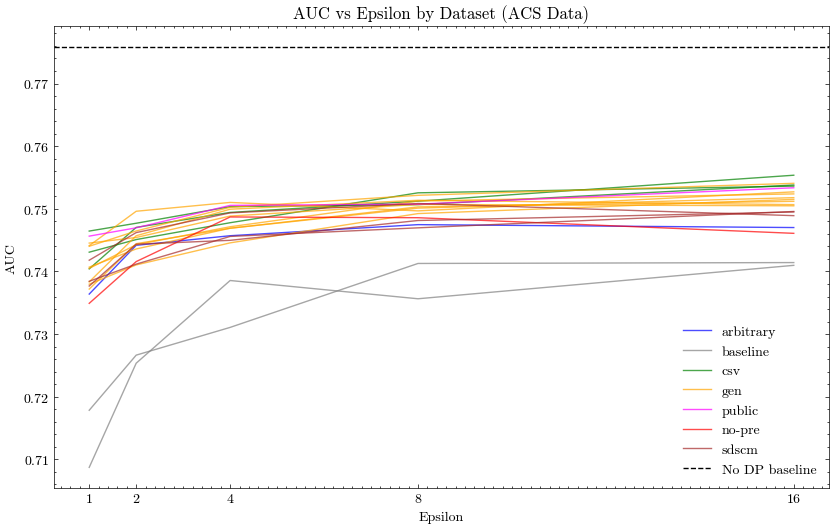

In [23]:
fig = plot_metrics(runs_df, no_dp_results, data_prefix="acs")
plt.show()

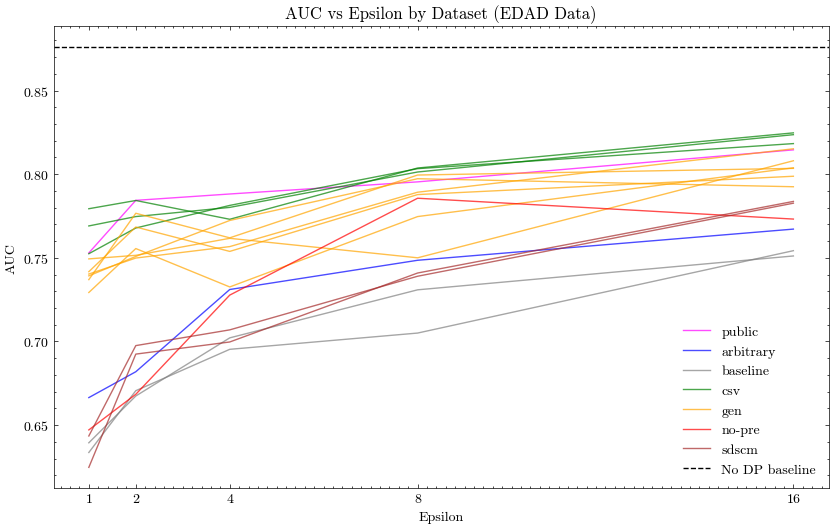

In [24]:
fig = plot_metrics(runs_df, no_dp_results, data_prefix="edad")
plt.show()

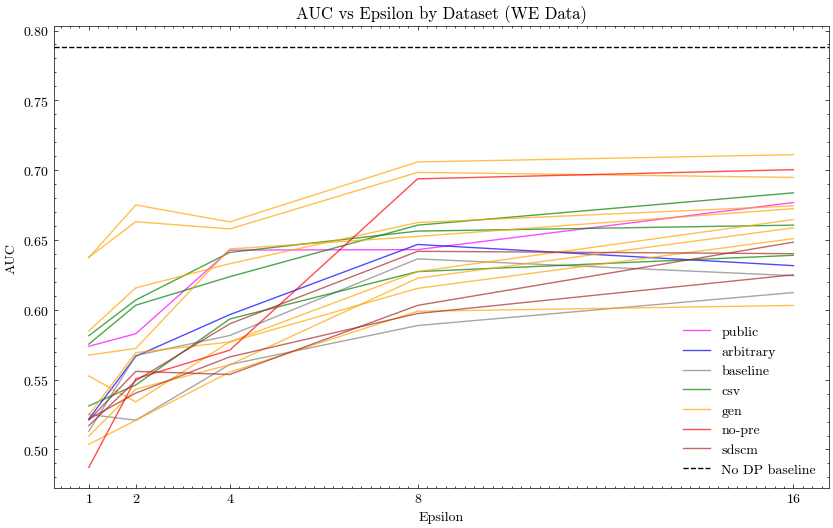

In [25]:
fig = plot_metrics(runs_df, no_dp_results, data_prefix="we")
plt.show()